In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data =  pd.read_feather('/content/drive/MyDrive/기업연계 프로젝트/lending_club_clean_N.feather')
new_data =  pd.read_feather('/content/drive/MyDrive/기업연계 프로젝트/lending_club_clean_N2.feather')

In [22]:
origin = pd.read_feather('/content/drive/MyDrive/기업연계 프로젝트/lending_club_clean.feather')

data: 2925492


(loan_status
 Fully Paid                                             1497783
 Current                                                1031016
 Charged Off                                             362548
 Late (31-120 days)                                       16154
 In Grace Period                                          10028
 Late (16-30 days)                                         2719
 Issued                                                    2062
 Does not meet the credit policy. Status:Fully Paid        1988
 Does not meet the credit policy. Status:Charged Off        761
 Default                                                    433
 Name: count, dtype: int64,
 loan_status
 Fully Paid                                             0.511976
 Current                                                0.352425
 Charged Off                                            0.123927
 Late (31-120 days)                                     0.005522
 In Grace Period                              

In [6]:
## 데이터 불러온 후 id ~ mths_since_last_delinq까지 추출하기
df = data.loc[ : , 'id':'mths_since_last_delinq'].copy()
df['loan_status'] = df['loan_status'].cat.remove_unused_categories()
# 데이터 복사
df2 = df.copy()

In [7]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq
0,1077501,5000,5000,4975.0,36,0.1065,162.869995,B,B2,NaN,...,Computer,860xx,AZ,27.650000,0,1985-01-01,735,739,1,-1
1,1077430,2500,2500,2500.0,60,0.1527,59.830002,C,C4,Ryder,...,bike,309xx,GA,1.000000,0,1999-04-01,740,744,5,-1
2,1077175,2400,2400,2400.0,36,0.1596,84.330002,C,C5,NaN,...,real estate business,606xx,IL,8.720000,0,2001-11-01,735,739,2,-1
3,1076863,10000,10000,10000.0,36,0.1349,339.309998,C,C1,AIR RESOURCES BOARD,...,personel,917xx,CA,20.000000,0,1996-02-01,690,694,1,35
4,1075358,3000,3000,3000.0,60,0.1269,67.790001,B,B5,University Medical Group,...,Personal,972xx,OR,17.940001,0,1996-01-01,695,699,0,38


In [8]:
## 모든 열을 불러오기
pd.set_option('display.max_columns', None)

In [9]:
# id와 url이 고유값이 맞는지 확인
# id와 url 모두 pk값이기 때문에 EDA
df['id'].nunique() ==  df['url'].nunique() ==  len(df)

True

In [10]:
# 고유값 제거
df = df.drop(['id', 'url'], axis = 1).copy()
df3 = df.copy()

In [11]:
# (이찬님이 올려 준 데이터에서)target값 이진변환한 loan_status_N을 df에 붙이기
if 'loan_status_N' not in df.columns:
    df = pd.concat([df, data['loan_status_N']], axis=1).copy()
df4 = df.copy()

In [12]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,loan_status_N
0,5000,5000,4975.0,36,0.1065,162.869995,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,860xx,AZ,27.650000,0,1985-01-01,735,739,1,-1,1
1,2500,2500,2500.0,60,0.1527,59.830002,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,bike,309xx,GA,1.000000,0,1999-04-01,740,744,5,-1,0
2,2400,2400,2400.0,36,0.1596,84.330002,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,606xx,IL,8.720000,0,2001-11-01,735,739,2,-1,1
3,10000,10000,10000.0,36,0.1349,339.309998,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,personel,917xx,CA,20.000000,0,1996-02-01,690,694,1,35,1
4,3000,3000,3000.0,60,0.1269,67.790001,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Fully Paid,n,other,Personal,972xx,OR,17.940001,0,1996-01-01,695,699,0,38,1


# Target 데이터 확인
**굵은 텍스트**

### Target값 변환 전 설명

*   Fully Paid: 대출이 전액 상환된 상태
*   Charged Off: 손실로 회계 처리된 상태
*   Current: 대출이 현재 정상적으로 상환되고 있는 상태
* Late (31-120 days): 31-120일 연체된 상태
* Late (16-30 days): 16-30일 연체된 상태
* In Grace Period: 연체됐지만 유예기간 내에 있는 상태
* Default: 대출자가 상환하지 않아 대출이 부도난 상태
(Charged Off와는 다르게, Default는 아직 공식적으로 상각되지 않았을 수 있음)
* Issued: 아직 상환이 시작되지 않은 상태

In [29]:
# 원본 데이터 타겟
print('data 수:',len(origin))
origin['loan_status'].value_counts(), origin['loan_status'].value_counts(normalize = True)

data 수: 2925492


(loan_status
 Fully Paid                                             1497783
 Current                                                1031016
 Charged Off                                             362548
 Late (31-120 days)                                       16154
 In Grace Period                                          10028
 Late (16-30 days)                                         2719
 Issued                                                    2062
 Does not meet the credit policy. Status:Fully Paid        1988
 Does not meet the credit policy. Status:Charged Off        761
 Default                                                    433
 Name: count, dtype: int64,
 loan_status
 Fully Paid                                             0.511976
 Current                                                0.352425
 Charged Off                                            0.123927
 Late (31-120 days)                                     0.005522
 In Grace Period                              

In Grace Period -> bad loan으로 보기 어려움!

Current -> bad/good이 섞여 있을 수 있음






In [31]:
# issued, policy~~ 제거
print('data 수:',len(df))
df['loan_status'].value_counts(), df['loan_status'].value_counts(normalize=True)

data 수: 2920681


(loan_status
 Fully Paid            1497783
 Current               1031016
 Charged Off            362548
 Late (31-120 days)      16154
 In Grace Period         10028
 Late (16-30 days)        2719
 Default                   433
 Name: count, dtype: int64,
 loan_status
 Fully Paid            0.512820
 Current               0.353005
 Charged Off           0.124131
 Late (31-120 days)    0.005531
 In Grace Period       0.003433
 Late (16-30 days)     0.000931
 Default               0.000148
 Name: proportion, dtype: float64)

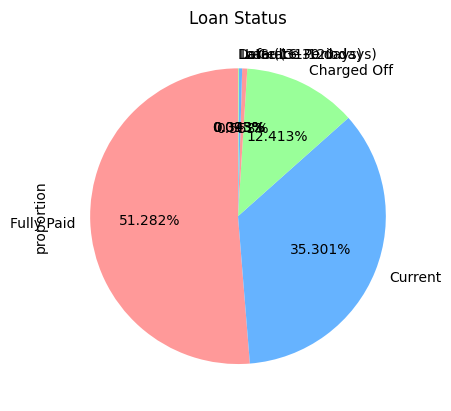

In [14]:
### raw target 파이차트 생성
import matplotlib.pyplot as plt

# loan_status의 빈도 계산
value_counts = df['loan_status'].value_counts()

# loan_status의 비율 계산
value_ratios = df['loan_status'].value_counts(normalize=True)

# count가 0인 값 제거(issued, does not ~~ policy)
value_counts = value_counts[value_counts != 0]
value_ratios = value_ratios[value_ratios != 0]

# 파이차트 생성(핑크, 파랑, 초록 순)
value_ratios.plot.pie(autopct='%.3f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Loan Status')
plt.show()

## Target 변환 후 설명

### Good Loan(1)
* Fully Paid
* Current

### Bad Loan(0)

* Charged Off
* Default
* Late (31-120 days)
* Late (16-30 days)
* In Grace Period

### 삭제
*   Issued
*   Does not meet the credit policy



In [32]:
# 1 = good, 0 = bad
print('data 수:',len(data))
data['loan_status_N'].value_counts(), data['loan_status_N'].value_counts(normalize=True)

data 수: 2920681


(loan_status_N
 1    2528799
 0     391882
 Name: count, dtype: int64,
 loan_status_N
 1    0.865825
 0    0.134175
 Name: proportion, dtype: float64)

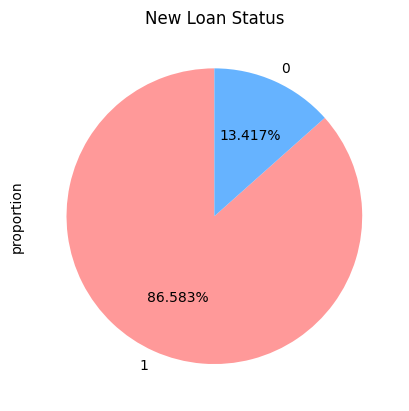

In [ ]:
new_value_ratios = df['loan_status_N'].value_counts(normalize=True)
# 파이차트 생성(핑크, 파랑)
new_value_ratios.plot.pie(autopct='%.3f%%', startangle= 90, colors=['#ff9999','#66b3ff'])
plt.title('New Loan Status')
plt.show()

In [20]:
# target 변환 버전2
print('data 수:',len(new_data))
new_data['loan_status_N'].value_counts(), new_data['loan_status_N'].value_counts(normalize = True)

data 수: 1879637


(loan_status_N
 1    1497783
 0     381854
 Name: count, dtype: int64,
 loan_status_N
 1    0.796847
 0    0.203153
 Name: proportion, dtype: float64)

In [ ]:
# loan_status에 따른 요약 통계 데이터 생성함수
def num_summary(data, condition_col=None, condition_val=None):
    if condition_col and condition_val:
        data = data[data[condition_col] == condition_val]

    df = data.select_dtypes(include=['int16', 'int32', 'int64','Int16', 'Int32', 'Int64', 'float32', 'float64'])

    # 전체건수, 평균, 표준편차
    desc = df.describe(percentiles=[]).T.iloc[:, [0, 1, 2]]

    # 분위수 -> 이상값을 확인하기 위해서
    prctls = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1]
    qtiles = df.quantile(prctls).T

    # NULL건수
    null = df.isnull().sum().rename("null_cnt")

    # 0건수
    zero = (df == 0).sum().rename("zero_cnt")

    # 전체건수 + 평균 + 표준편차 + 각 분위수 + null건수 + 0건수를 합친 DF 생성
    eda_num_smm = pd.concat([desc, null, zero, qtiles], axis=1)
    eda_num_smm = eda_num_smm.reset_index(drop=False)

    # 컬럼 이름 설정
    columns = ["feature", "count", "mean", "std", "null", "zero", "min", "Q1", "Q2", "Q3", "Q4", "Q5", "Q10", "Q25", "Q50", "Q75", "Q90", "Q95", "Q96", "Q97", "Q98", "Q99", "max"]
    eda_num_smm.columns = columns

    return eda_num_smm

In [ ]:
# set(df['loan_status'].values)

In [ ]:
# for _ in set(df['loan_status'].values):
#     exec(f"{_} = num_summary(df, '{_}')") -> exec보다 dictionary 사용이 나은 접근

In [ ]:
# loan_status 값 별 요약 통계데이터 생성
Charged_Off = num_summary(df,'loan_status', 'Charged Off')
Current = num_summary(df,'loan_status', 'Current')
Default = num_summary(df,'loan_status', 'Default')
Fully_Paid =  num_summary(df, 'loan_status', 'Fully Paid')
In_Grace_Period = num_summary(df,'loan_status', 'In Grace Period')
Late1 = num_summary(df,'loan_status', 'Late (16-30 days)')
Late2 = num_summary(df,'loan_status','Late (31-120 days)')

# loan_status_N 값 별 요약 통계데이터 생성
good = num_summary(df,'loan_status_N', 1)
bad = num_summary(df,'loan_status_N', 0)

In [ ]:
bad

,feature,count,mean,std,null,zero,min,Q1,Q2,Q3,Q4,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q96,Q97,Q98,Q99,max
0,loan_amnt,2920681.0,15364.300603,9478.586783,0,0,500.0,1500.0,2000.0,2525.0,3000.0,3225.0,5000.0,8000.0,13000.0,20050.0,30000.0,35000.0,35000.0,35500.0,40000.0,40000.0,40000.0
1,funded_amnt,2920681.0,15360.414763,9477.308838,0,0,500.0,1500.0,2000.0,2525.0,3000.0,3225.0,5000.0,8000.0,13000.0,20000.0,30000.0,35000.0,35000.0,35500.0,40000.0,40000.0,40000.0
2,funded_amnt_inv,2920681.0,15348.169922,9478.967773,0,129,0.0,1500.0,2000.0,2500.0,3000.0,3200.0,5000.0,8000.0,13000.0,20000.0,30000.0,35000.0,35000.0,35475.0,40000.0,40000.0,40000.0
3,term,2920681.0,43.104768,10.956128,0,0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0
4,int_rate,2920681.0,0.130449,0.048628,0,0,0.0531,0.0532,0.0593,0.0611,0.0646,0.0646,0.0724,0.0917,0.1249,0.1599,0.1953,0.2235,0.2305,0.2408,0.2549,0.2727,0.3099
5,installment,2920681.0,452.524902,272.945251,0,0,4.93,53.009998,71.5,89.120003,99.669998,110.43,159.710007,253.699997,382.5,604.210022,846.070007,1003.429993,1068.839966,1124.589966,1196.050049,1246.97998,1719.829956
6,annual_inc,2920681.0,79936.5,111771.5625,0,3052,0.0,16000.0,20500.0,24000.0,25000.0,28000.0,34582.0,47000.0,66000.0,95000.0,135000.0,169000.0,180000.0,200000.0,225000.0,280000.0,110000000.0
7,dti,2920681.0,19.277536,15.733547,0,2328,-2.0,1.61,2.76,3.62,4.35,4.98,7.38,12.06,18.09,24.879999,31.139999,34.689999,35.860001,37.380001,39.200001,48.119999,999.0
8,delinq_2yrs,2920681.0,0.28981,0.843889,0,2402875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,3.0,4.0,58.0
9,fico_range_low,2920681.0,700.518139,33.763468,0,0,625.0,660.0,660.0,660.0,660.0,660.0,665.0,675.0,695.0,720.0,750.0,770.0,775.0,780.0,790.0,805.0,845.0


In [ ]:
good

,feature,count,mean,std,null,zero,min,Q1,Q2,Q3,Q4,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q96,Q97,Q98,Q99,max
0,loan_amnt,2528799.0,15264.18189,9522.776953,0,0,500.0,1500.0,2000.0,2500.0,3000.0,3200.0,5000.0,8000.0,13000.0,20000.0,30000.0,35000.0,35000.0,36000.0,40000.0,40000.0,40000.0
1,funded_amnt,2528799.0,15260.543009,9521.63855,0,0,500.0,1500.0,2000.0,2500.0,3000.0,3200.0,5000.0,8000.0,13000.0,20000.0,30000.0,35000.0,35000.0,36000.0,40000.0,40000.0,40000.0
2,funded_amnt_inv,2528799.0,15249.322266,9523.176758,0,102,0.0,1500.0,2000.0,2500.0,3000.0,3125.0,5000.0,8000.0,13000.0,20000.0,30000.0,35000.0,35000.0,36000.0,40000.0,40000.0,40000.0
3,term,2528799.0,42.71613,10.774079,0,0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0
4,int_rate,2528799.0,0.126465,0.047109,0,0,0.0531,0.0532,0.0532,0.0608,0.0624,0.0646,0.0707,0.0881,0.1199,0.1531,0.1899,0.2145,0.2239,0.2305,0.2485,0.263,0.3099
5,installment,2528799.0,448.982758,273.211609,0,0,4.93,51.75,69.57,86.309998,98.25,108.07,157.130005,249.649994,377.709991,602.210022,843.219971,1002.179993,1068.839966,1123.339966,1196.050049,1245.359985,1719.829956
6,annual_inc,2528799.0,81054.453125,93899.132812,0,2782,0.0,16140.0,21000.0,24000.0,25824.0,28000.0,35000.0,48000.0,68000.0,97000.0,135200.0,170000.0,182000.0,200000.0,230000.0,290000.0,61000000.0
7,dti,2528799.0,19.121315,15.843002,0,1997,-2.0,1.59,2.73,3.58,4.3,4.92,7.28,11.91,17.870001,24.639999,30.959999,34.630001,35.810001,37.369999,39.25,48.530199,999.0
8,delinq_2yrs,2528799.0,0.282546,0.83159,0,2089275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,3.0,4.0,58.0
9,fico_range_low,2528799.0,702.114464,34.33785,0,0,625.0,660.0,660.0,660.0,660.0,660.0,665.0,675.0,695.0,720.0,750.0,770.0,780.0,785.0,795.0,805.0,845.0


In [ ]:
Charged_Off

,feature,count,mean,std,null,zero,min,Q1,Q2,Q3,Q4,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q96,Q97,Q98,Q99,max
0,loan_amnt,362548.0,15899.495998,9083.262192,0,0,900.0,2000.0,2500.0,3000.0,3500.0,4000.0,5000.0,9250.0,14700.0,21000.0,30000.0,35000.0,35000.0,35000.0,35000.0,40000.0,40000.0
1,funded_amnt,362548.0,15893.573196,9080.912496,0,0,900.0,2000.0,2500.0,3000.0,3500.0,4000.0,5000.0,9250.0,14700.0,21000.0,30000.0,35000.0,35000.0,35000.0,35000.0,40000.0,40000.0
2,funded_amnt_inv,362548.0,15873.446289,9084.001953,0,27,0.0,2000.0,2500.0,3000.0,3500.0,4000.0,5000.0,9175.0,14625.0,21000.0,30000.0,35000.0,35000.0,35000.0,35000.0,40000.0,40000.0
3,term,362548.0,45.589196,11.755357,0,0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0
4,int_rate,362548.0,0.156559,0.050217,0,0,0.0531,0.0649,0.0712,0.0749,0.0789,0.0799,0.0975,0.1205,0.1499,0.1855,0.227,0.2529,0.2582,0.263,0.277954,0.2999,0.3099
5,installment,362548.0,472.760437,268.446228,0,0,21.620001,66.218797,87.269997,102.650002,118.699997,133.419998,176.460007,277.410004,407.26001,620.75,860.409973,1006.929993,1059.342368,1121.430054,1190.290039,1258.641216,1717.630005
6,annual_inc,362548.0,71988.421875,195226.25,0,216,0.0,15600.0,20000.0,22500.0,25000.0,25986.7,32000.0,44000.0,60000.0,85000.0,120000.0,150000.0,155000.0,171000.0,195000.0,240000.0,110000000.0
7,dti,362548.0,20.254637,14.278526,0,287,-2.0,1.78,3.05,4.0,4.82,5.5,8.16,13.26,19.59,26.299999,32.0,34.810001,35.8912,37.209999,38.709999,44.0453,999.0
8,delinq_2yrs,362548.0,0.337986,0.921059,0,289922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,4.0,36.0
9,fico_range_low,362548.0,689.666306,27.320065,0,0,660.0,660.0,660.0,660.0,660.0,660.0,660.0,670.0,685.0,705.0,725.0,745.0,750.0,755.0,765.0,785.0,845.0


In [ ]:
Fully_Paid

,feature,count,mean,std,null,zero,min,Q1,Q2,Q3,Q4,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q96,Q97,Q98,Q99,max
0,loan_amnt,1497783.0,14270.882481,8914.011886,0,0,500.0,1500.0,2000.0,2500.0,3000.0,3000.0,4750.0,7350.0,12000.0,20000.0,28000.0,33825.0,35000.0,35000.0,35000.0,38300.0,40000.0
1,funded_amnt,1497783.0,14264.74541,8911.273371,0,0,500.0,1500.0,2000.0,2500.0,3000.0,3000.0,4750.0,7350.0,12000.0,20000.0,28000.0,33750.0,35000.0,35000.0,35000.0,38300.0,40000.0
2,funded_amnt_inv,1497783.0,14247.864258,8912.49707,0,102,0.0,1500.0,2000.0,2400.0,3000.0,3000.0,4650.0,7250.0,12000.0,20000.0,28000.0,33700.0,35000.0,35000.0,35000.0,38275.0,40000.0
3,term,1497783.0,41.162446,9.861436,0,0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,36.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0
4,int_rate,1497783.0,0.125684,0.045819,0,0,0.0531,0.0532,0.0532,0.0593,0.0608,0.0639,0.0721,0.0916,0.1199,0.1505,0.1862,0.2099,0.2185,0.2291,0.2433,0.2583,0.3099
5,installment,1497783.0,432.38797,265.939575,0,0,4.93,49.82,67.129997,81.440002,94.349998,102.419998,152.460007,238.169998,366.369995,575.10498,808.559998,973.919983,1028.800049,1095.160034,1162.339966,1230.329956,1719.829956
6,annual_inc,1497783.0,78672.140625,89487.140625,0,869,0.0,18000.0,22000.0,24531.227969,26000.0,28000.0,35000.0,47000.0,65000.0,95000.0,130000.0,162000.0,175000.0,193000.0,220000.0,275000.0,61000000.0
7,dti,1497783.0,18.144199,12.760966,0,1068,-2.0,1.63,2.69,3.5,4.18,4.78,7.04,11.52,17.280001,23.76,29.629999,32.98,33.82,34.75,36.57,39.18,999.0
8,delinq_2yrs,1497783.0,0.306797,0.863947,0,1217970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,3.0,4.0,42.0
9,fico_range_low,1497783.0,699.617875,33.598429,0,0,625.0,660.0,660.0,660.0,660.0,660.0,665.0,675.0,690.0,715.0,745.0,770.0,775.0,780.0,790.0,805.0,845.0


In [ ]:
# 요약된 통계 데이터 csv로 저장
# dfs = {
#     "Charged_Off": Charged_Off,
#     "Current": Current,
#     "Default": Default,
#     "Fully_Paid": Fully_Paid,
#     "In_Grace_Period": In_Grace_Period,
#     "Late1": Late1,
#     "Late2": Late2,
#     "good": good,
#     "bad": bad
# }

# # csv로 저장
# for name, data in dfs.items():
#     filename = f"{name}.csv"
#     data.to_csv(filename, index=False)
#     print(f"Saved {name} to {filename}")

In [ ]:
def plot_boxplots(data, groupby_col):

    num_cols = data.select_dtypes(include=['int16', 'int32', 'int64', 'float32', 'float64', 'Int64']).columns.to_list()
    if groupby_col in num_cols :
        iter_cols = num_cols
    else:
        iter_cols = num_cols + [groupby_col]

    temp = data[iter_cols].copy()

    # 각 숫자형 변수에 대해 Box Plot 생성
    for col in num_cols:
        if col != groupby_col :
            plt.figure(figsize=(10, 6))
            temp.boxplot(column=col, by=groupby_col, grid=False)
            plt.xticks(rotation=45)
            # plt.title(f'Box Plot of {col} by {groupby_col}')
            plt.show()

<Figure size 1000x600 with 0 Axes>

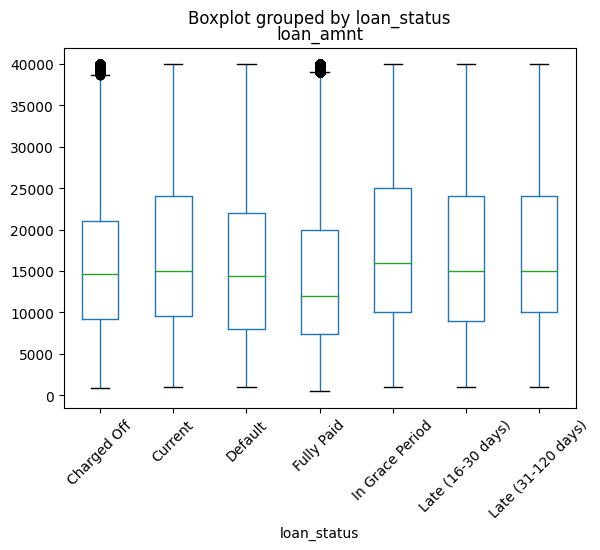

<Figure size 1000x600 with 0 Axes>

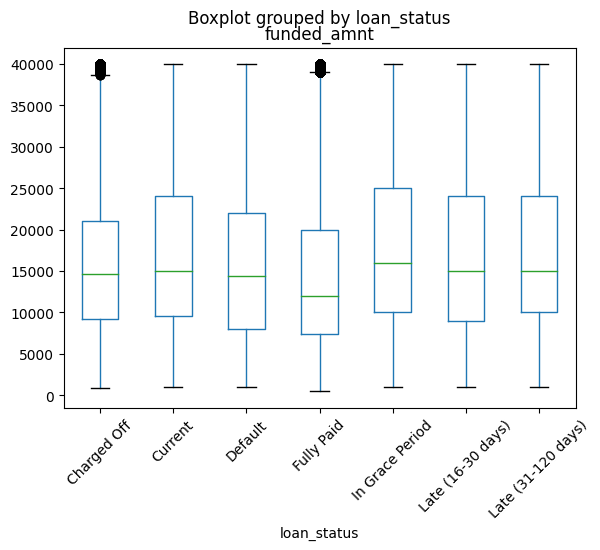

<Figure size 1000x600 with 0 Axes>

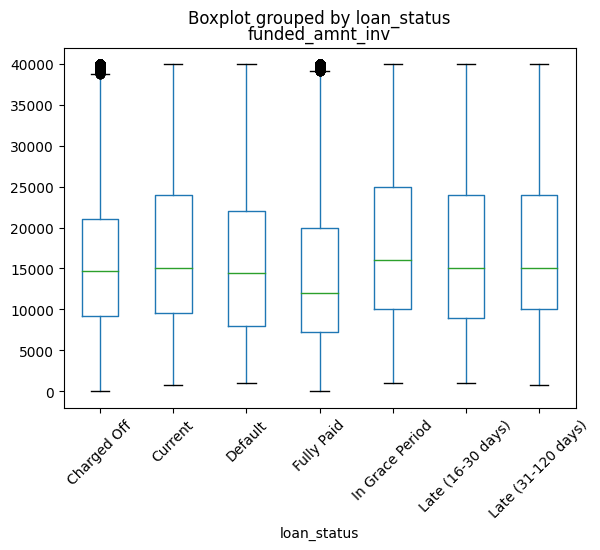

<Figure size 1000x600 with 0 Axes>

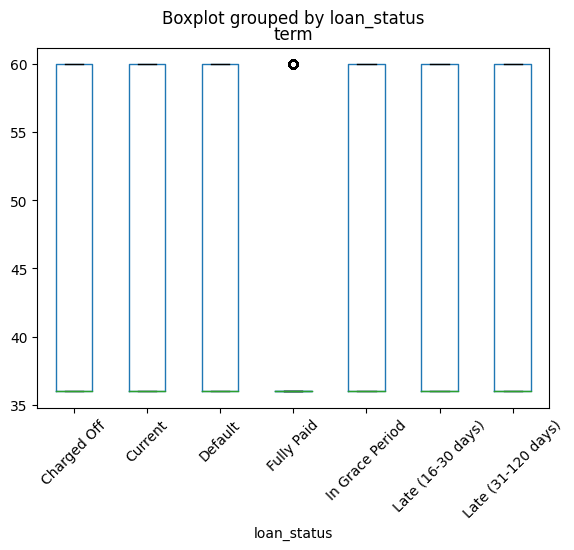

<Figure size 1000x600 with 0 Axes>

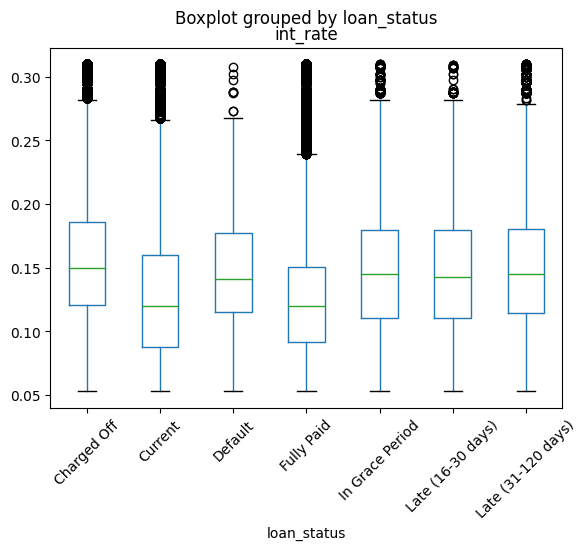

<Figure size 1000x600 with 0 Axes>

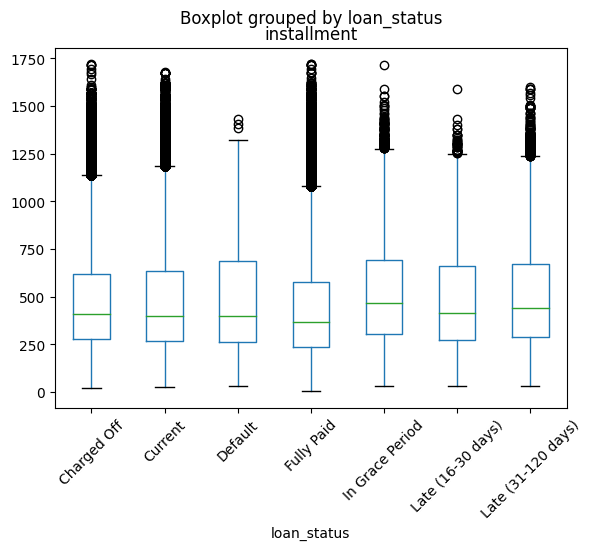

<Figure size 1000x600 with 0 Axes>

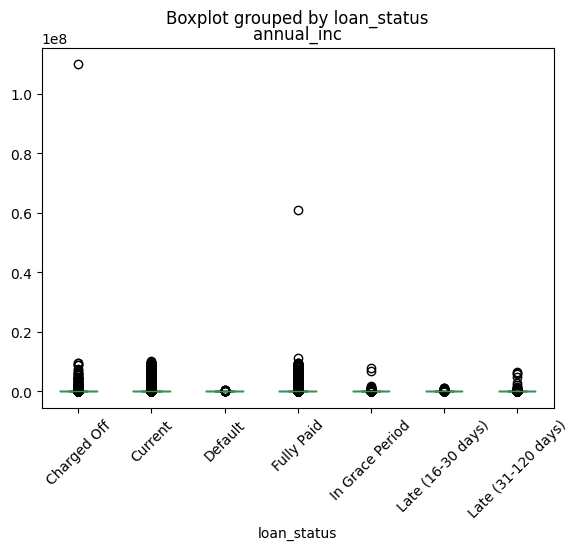

<Figure size 1000x600 with 0 Axes>

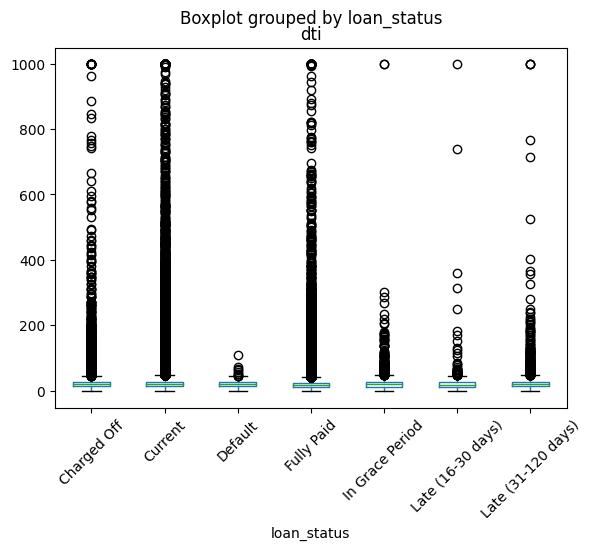

<Figure size 1000x600 with 0 Axes>

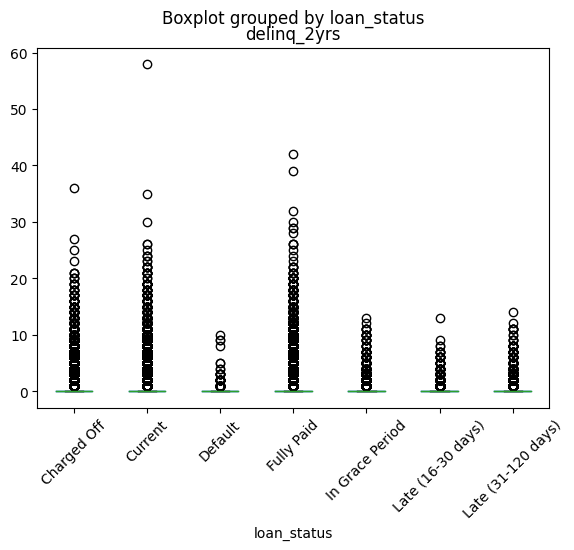

<Figure size 1000x600 with 0 Axes>

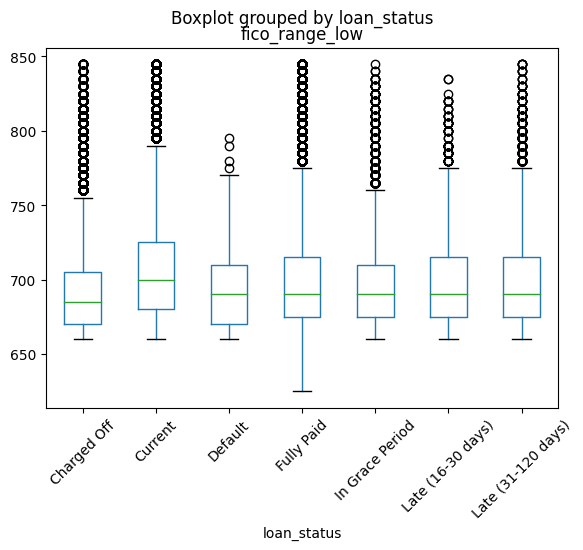

<Figure size 1000x600 with 0 Axes>

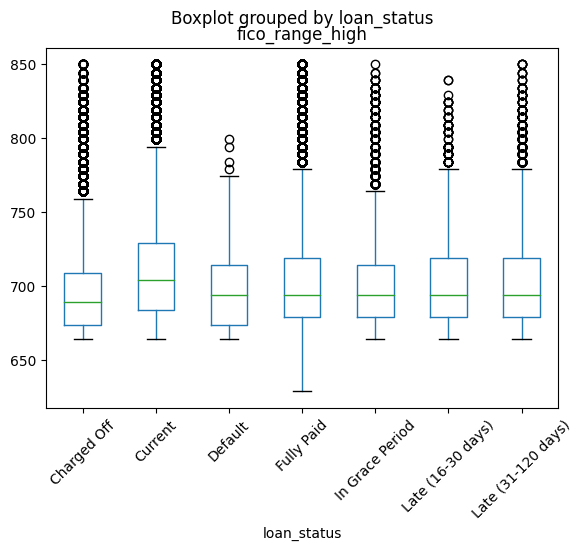

<Figure size 1000x600 with 0 Axes>

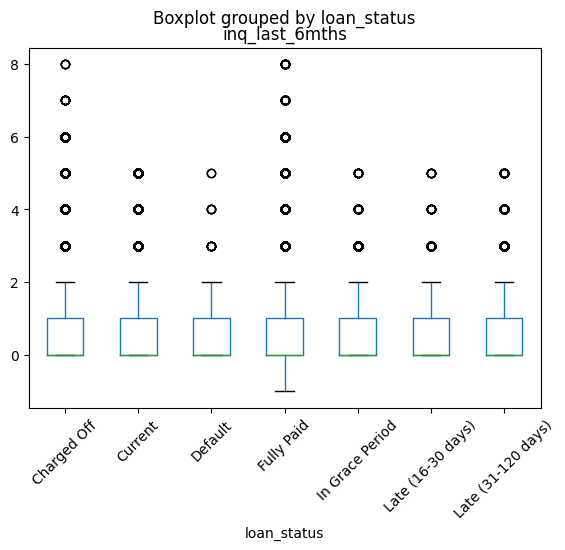

<Figure size 1000x600 with 0 Axes>

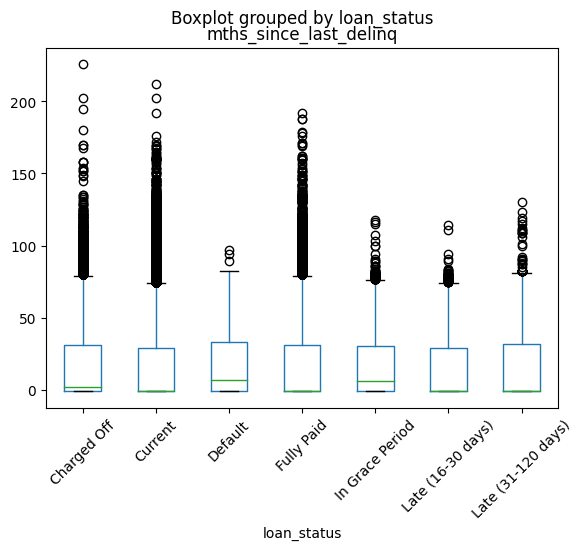

<Figure size 1000x600 with 0 Axes>

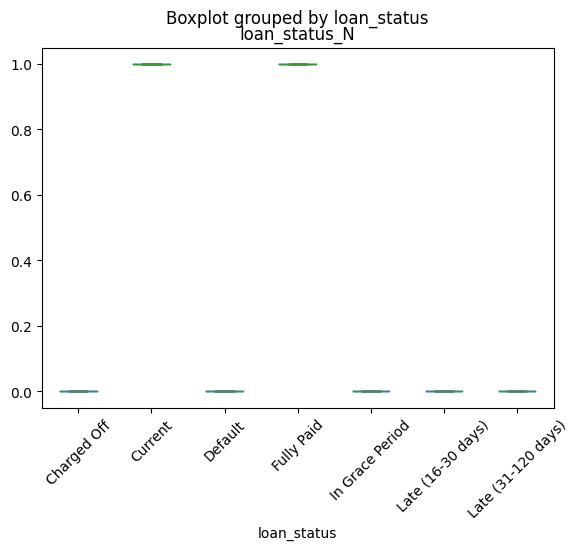

In [ ]:
plot_boxplots(df, 'loan_status')

<Figure size 1000x600 with 0 Axes>

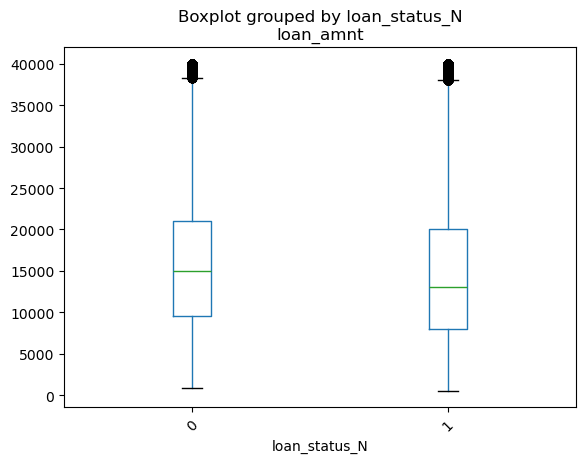

<Figure size 1000x600 with 0 Axes>

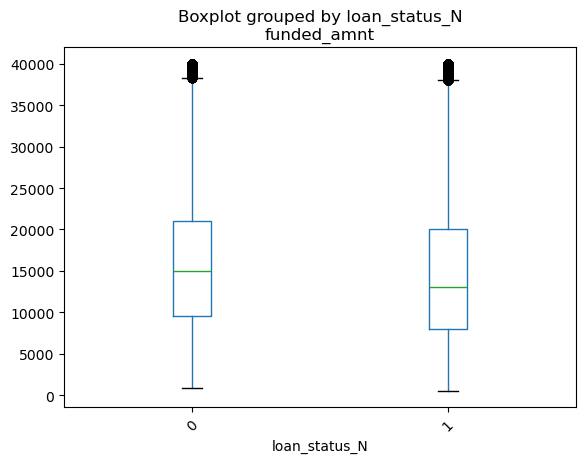

<Figure size 1000x600 with 0 Axes>

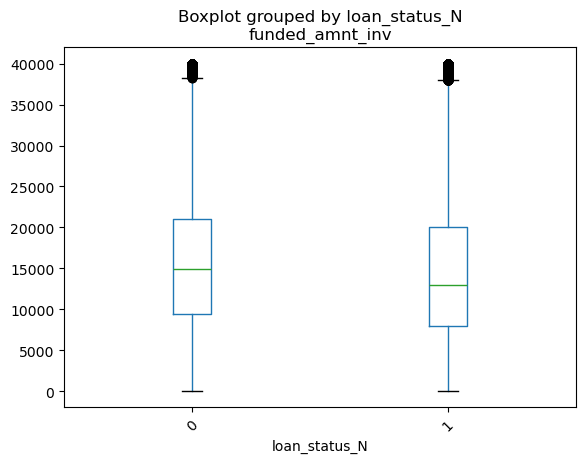

<Figure size 1000x600 with 0 Axes>

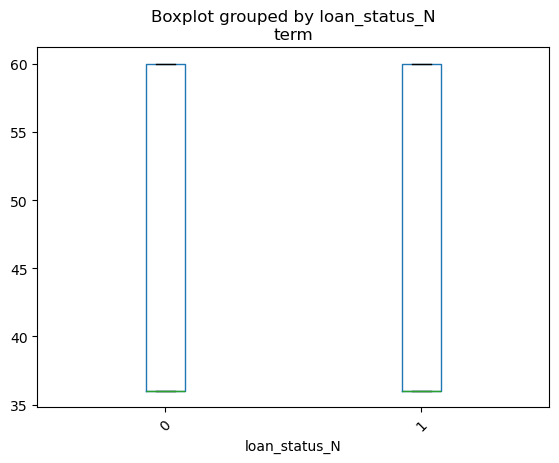

<Figure size 1000x600 with 0 Axes>

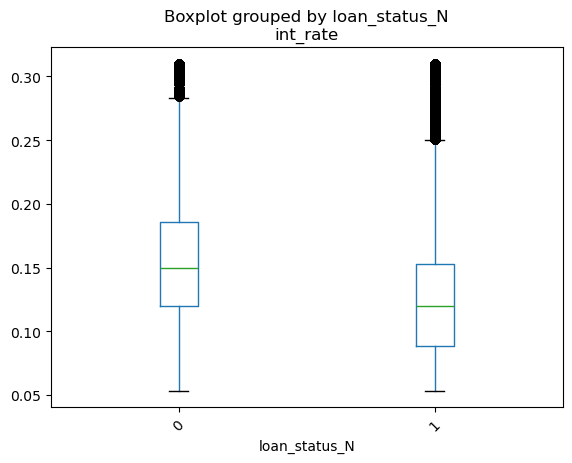

<Figure size 1000x600 with 0 Axes>

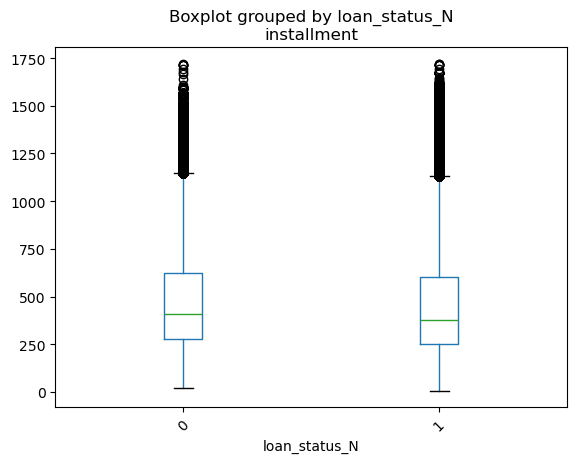

<Figure size 1000x600 with 0 Axes>

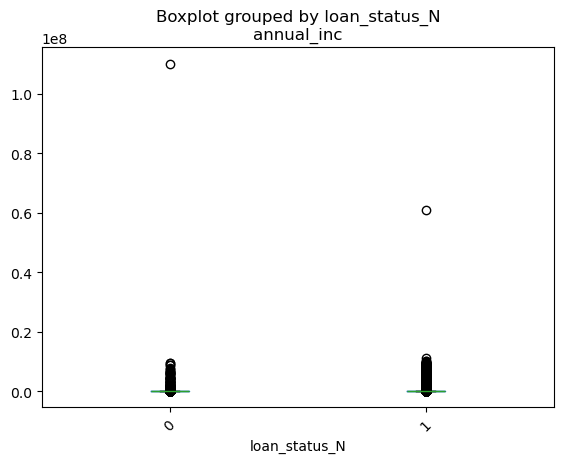

<Figure size 1000x600 with 0 Axes>

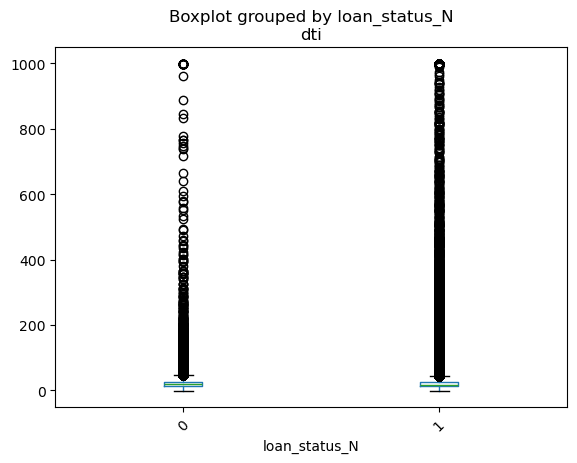

<Figure size 1000x600 with 0 Axes>

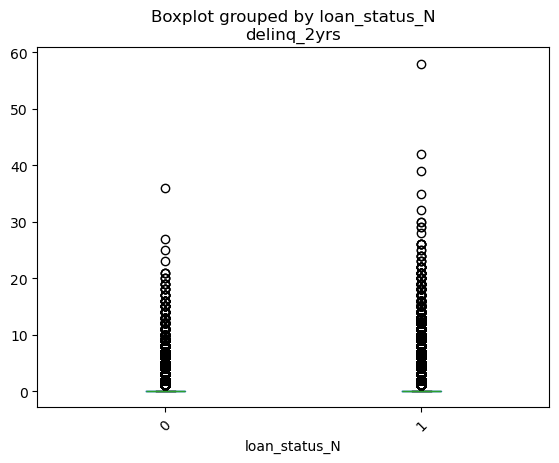

<Figure size 1000x600 with 0 Axes>

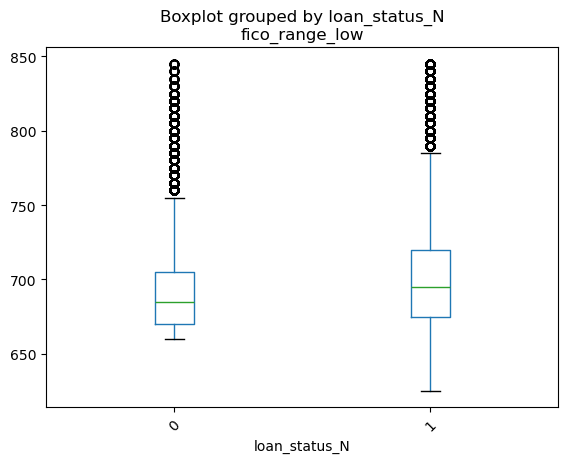

<Figure size 1000x600 with 0 Axes>

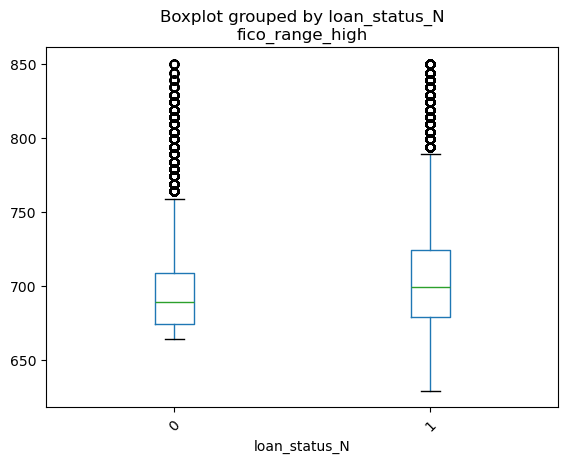

<Figure size 1000x600 with 0 Axes>

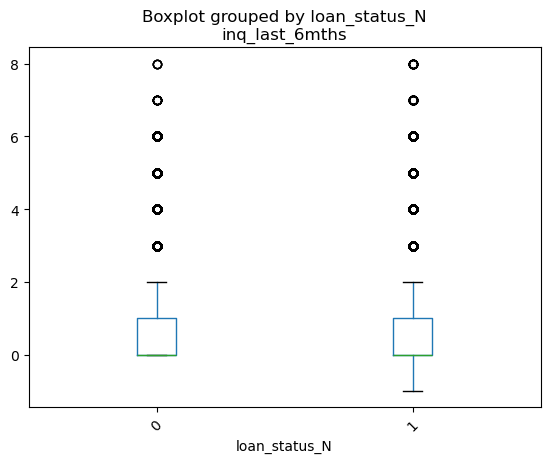

<Figure size 1000x600 with 0 Axes>

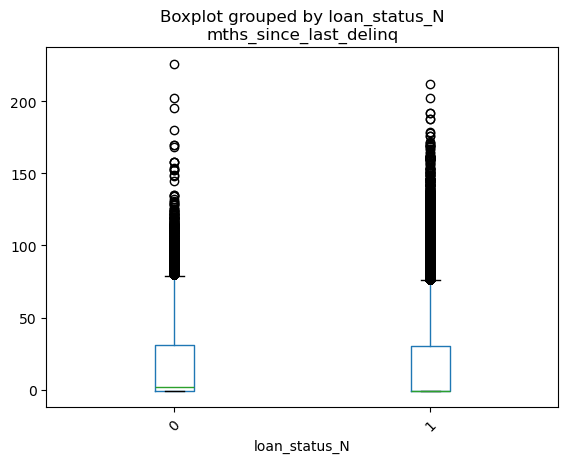

In [ ]:
plot_boxplots(df, 'loan_status_N')

# 범주형 데이터 EDA

In [ ]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,loan_status_N
0,5000,5000,4975.0,36,0.1065,162.869995,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,860xx,AZ,27.650000,0,1985-01-01,735,739,1,-1,1
1,2500,2500,2500.0,60,0.1527,59.830002,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,bike,309xx,GA,1.000000,0,1999-04-01,740,744,5,-1,0
2,2400,2400,2400.0,36,0.1596,84.330002,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,606xx,IL,8.720000,0,2001-11-01,735,739,2,-1,1
3,10000,10000,10000.0,36,0.1349,339.309998,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,personel,917xx,CA,20.000000,0,1996-02-01,690,694,1,35,1
4,3000,3000,3000.0,60,0.1269,67.790001,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Fully Paid,n,other,Personal,972xx,OR,17.940001,0,1996-01-01,695,699,0,38,1


In [ ]:
df['grade'].value_counts(), df['sub_grade'].value_counts()

(grade
 B    856761
 C    801349
 A    655005
 D    415486
 E    138500
 F     41589
 G     11991
 Name: count, dtype: int64,
 sub_grade
 B4    185028
 B5    181646
 C1    178892
 B2    164727
 B1    163307
 B3    162053
 C2    161576
 C3    158828
 A4    158146
 A5    156726
 C4    152996
 C5    149057
 A1    133051
 D2    108479
 A3    106168
 A2    100914
 D1    100679
 D3     82903
 D4     66934
 D5     56491
 E1     34722
 E2     30214
 E3     27117
 E5     23325
 E4     23122
 F1     13362
 F2      9257
 F3      7745
 F4      6087
 F5      5138
 G1      4077
 G2      2668
 G3      2065
 G4      1669
 G5      1512
 Name: count, dtype: int64)

In [ ]:
# df grade와 sub_grade가 매칭이 제대로 되는지 확인 -> 없음
df[df['sub_grade'].str[0] != df['grade']]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,loan_status_N


In [ ]:
emp_title = df['emp_title'].value_counts().reset_index()
emp_title

emp_title.to_csv('emp_title.csv', index=False)

In [ ]:
emp_title[emp_title['count'] > 0].head(50) # 588717개

,emp_title,count
0,Teacher,50073
1,Manager,43697
2,Owner,24785
3,Registered Nurse,20717
4,Driver,19662
5,RN,18414
6,Supervisor,17960
7,Sales,16056
8,Project Manager,14084
9,Office Manager,12803


In [ ]:
# 공백제거 및 소문자 변환 후 emp_title 고유값 확인
df['emp_title'] = df['emp_title'].str.lower().str.strip()
df['emp_title'].nunique()

468563

In [ ]:
emp_title_lower = df['emp_title'].value_counts().reset_index()
emp_title_lower

emp_title_lower.to_csv('emp_title_lower.csv', index=False)

In [ ]:
import re

# 정규 표현식을 사용하여 이모티콘이 포함된 값을 필터링하는 함수
def contains_emoji(s):
    if pd.isnull(s):
        return False
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002500-\U00002BEF"  # chinese char
        "\U00002702-\U000027B0"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "\U0001f926-\U0001f937"
        "\U00010000-\U0010ffff"
        "\u2640-\u2642"
        "\u2600-\u2B55"
        "\u200d"
        "\u23cf"
        "\u23e9"
        "\u231a"
        "\ufe0f"  # dingbats
        "\u3030"
        "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(s))

# 이모티콘이 포함된 행 필터링
emoji_rows = df[df['emp_title'].apply(contains_emoji)]

# 결과 출력 -> 이모지, 이모티콘 존재, 나중에 처리 해주어야 할 것 같음
emoji_rows

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,loan_status_N
620944,7000,7000,7000.0,36,0.1007,226.110001,B,B2,registered 👨🏻‍⚕️,2 years,RENT,39744.0,Source Verified,2018-05-01,Fully Paid,n,credit_card,Credit card refinancing,319xx,GA,32.130001,0,1994-12-01,745,749,1,-1,1
687549,30000,30000,30000.0,60,0.1504,714.330017,C,C4,👨‍🍳,1 year,OWN,25000.0,Not Verified,2018-04-01,Current,n,credit_card,Credit card refinancing,104xx,NY,0.000000,0,2006-09-01,775,779,2,-1,1
1307355,15950,15950,15950.0,60,0.1308,363.570007,B,B5,"manager, research ＆ competitive intellig",10+ years,OWN,132000.0,Not Verified,2019-07-01,Current,n,credit_card,Credit card refinancing,126xx,NY,13.920000,0,1997-05-01,675,679,1,31,1


In [ ]:
df['emp_length'].value_counts()

emp_length
10+ years    945173
< 1 year     271485
2 years      261345
3 years      231880
1 year       193689
5 years      182067
4 years      175805
6 years      130511
7 years      115889
8 years      112538
9 years       95271
Name: count, dtype: int64

In [ ]:
temp = df[(df['emp_title'].isna()) & (df['emp_length'].isna())].loc[:, ['emp_title', 'emp_length','loan_status', 'loan_status_N']]

In [ ]:
temp # emp_title과 emp_length가 공통으로 결측값인 것 20만개 존재

,emp_title,emp_length,loan_status,loan_status_N
168,NaN,NaN,Charged Off,0
323,NaN,NaN,Fully Paid,1
394,NaN,NaN,Fully Paid,1
422,NaN,NaN,Charged Off,0
439,NaN,NaN,Fully Paid,1
...,...,...,...,...
2925443,NaN,NaN,Charged Off,0
2925444,NaN,NaN,Charged Off,0
2925447,NaN,NaN,Fully Paid,1
2925461,NaN,NaN,Charged Off,0


In [ ]:
len(df[(df['emp_title'].isna()) & (df['emp_length'].isna())].loc[:, 'emp_title':'emp_length'])

204127

In [ ]:
# emp_title과 emp_length가 모두 결측치인 행
temp['loan_status_N'].value_counts()

loan_status_N
1    170465
0     33662
Name: count, dtype: int64

In [ ]:
170465/len(temp), 33662/len(temp) # 전체에 비해 1비율은 많고 0비율은 적음, 직업이 null이면 상환확률이 적음!

(0.835092858857476, 0.16490714114252403)

In [ ]:
temp2 = df[~((df['emp_title'].isna()) & (df['emp_length'].isna()))].loc[:, ['emp_title', 'emp_length','loan_status', 'loan_status_N']]

In [ ]:
# ~temp인 행 (둘 중 하나라도 결측치가 아닌 행)
temp2

,emp_title,emp_length,loan_status,loan_status_N
0,NaN,10+ years,Fully Paid,1
1,ryder,< 1 year,Charged Off,0
2,NaN,10+ years,Fully Paid,1
3,air resources board,10+ years,Fully Paid,1
4,university medical group,1 year,Fully Paid,1
...,...,...,...,...
2925487,senior escrow officer,< 1 year,Charged Off,0
2925488,rn,10+ years,Fully Paid,1
2925489,sales associate,8 years,Charged Off,0
2925490,contact input,5 years,Fully Paid,1


In [ ]:
2358334/len(temp2), 358220/len(temp2) #  전체 86%, 13%과 유사함

(0.8681344085190281, 0.13186559148097185)

In [ ]:
df['emp_length'].isna().sum()

205028

In [ ]:
df['title'].value_counts().head(30)

title
Debt consolidation           1512379
Credit card refinancing       647789
Home improvement              179824
Other                         165657
Major purchase                 57034
Medical expenses               33168
Car financing                  26300
Business                       26071
Vacation                       19107
Home buying                    18162
Moving and relocation          17571
Debt Consolidation             15695
Consolidation                   5355
debt consolidation              4813
Debt Consolidation Loan         3777
Credit Card Consolidation       2347
consolidation                   2163
Personal Loan                   2086
Consolidation Loan              1770
Home Improvement                1757
Green loan                      1554
Credit Card Refinance           1465
Credit Card Payoff              1377
Consolidate                     1254
Personal                        1164
Loan                            1028
Freedom                         

In [ ]:
# pymnt_plan
df2['pymnt_plan'].value_counts()

pymnt_plan
n    2920681
Name: count, dtype: int64

In [ ]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,loan_status_N
0,5000,5000,4975.0,36,0.1065,162.869995,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,860xx,AZ,27.650000,0,1985-01-01,735,739,1,-1,1
1,2500,2500,2500.0,60,0.1527,59.830002,C,C4,ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,bike,309xx,GA,1.000000,0,1999-04-01,740,744,5,-1,0
2,2400,2400,2400.0,36,0.1596,84.330002,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,606xx,IL,8.720000,0,2001-11-01,735,739,2,-1,1
3,10000,10000,10000.0,36,0.1349,339.309998,C,C1,air resources board,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,personel,917xx,CA,20.000000,0,1996-02-01,690,694,1,35,1
4,3000,3000,3000.0,60,0.1269,67.790001,B,B5,university medical group,1 year,RENT,80000.0,Source Verified,2011-12-01,Fully Paid,n,other,Personal,972xx,OR,17.940001,0,1996-01-01,695,699,0,38,1


In [ ]:
# 대출 상환 기간이 36개월인 사람들과 60개월인 사람들도 차이가 있지 않을까?
df[df['term']==36]['loan_status'].value_counts(normalize=True)

loan_status
Fully Paid            0.571775
Current               0.313967
Charged Off           0.105878
Late (31-120 days)    0.004611
In Grace Period       0.002818
Late (16-30 days)     0.000803
Default               0.000149
Name: proportion, dtype: float64

In [ ]:
df[df['term']==36]['loan_status_N'].value_counts(normalize=True)

loan_status_N
1    0.885742
0    0.114258
Name: proportion, dtype: float64

In [ ]:
df[df['term']==60]['loan_status'].value_counts(normalize=True)

loan_status
Current               0.445840
Fully Paid            0.372624
Charged Off           0.167538
Late (31-120 days)    0.007718
In Grace Period       0.004898
Late (16-30 days)     0.001236
Default               0.000146
Name: proportion, dtype: float64

In [ ]:
df[df['term']==60]['loan_status_N'].value_counts(normalize=True)

loan_status_N
1    0.818464
0    0.181536
Name: proportion, dtype: float64

In [ ]:
title = df['title'].value_counts().reset_index()
title

,title,count
0,Debt consolidation,1512379
1,Credit card refinancing,647789
2,Home improvement,179824
3,Other,165657
4,Major purchase,57034
...,...,...
63150,paying off all my debts,0
63151,Fall 2007 Tuition,0
63152,The Greek Tavern,0
63153,Moving to Cali,0


In [ ]:
len(title[title['count'] > 0])

61685

In [ ]:
title_new = title[title['count'] > 0]
title_new.loc[:,'title'] = title_new.loc[:,'title'].str.lower().str.strip()
title_new['title'].nunique()

50483

In [ ]:
title_new.to_csv('title_lower.csv', index = False)
title_new

,title,count
0,debt consolidation,1512379
1,credit card refinancing,647789
2,home improvement,179824
3,other,165657
4,major purchase,57034
...,...,...
61680,go home,1
61681,go loan,1
61682,inventory stock capital,1
61683,go to ireland,1


In [ ]:
category = df.select_dtypes(include=['category'])

In [ ]:
category

,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,title,zip_code,addr_state
0,B,B2,10+ years,RENT,Verified,Fully Paid,n,credit_card,Computer,860xx,AZ
1,C,C4,< 1 year,RENT,Source Verified,Charged Off,n,car,bike,309xx,GA
2,C,C5,10+ years,RENT,Not Verified,Fully Paid,n,small_business,real estate business,606xx,IL
3,C,C1,10+ years,RENT,Source Verified,Fully Paid,n,other,personel,917xx,CA
4,B,B5,1 year,RENT,Source Verified,Fully Paid,n,other,Personal,972xx,OR
...,...,...,...,...,...,...,...,...,...,...,...
2925487,E,E2,< 1 year,RENT,Source Verified,Charged Off,n,other,Other,801xx,CO
2925488,A,A5,10+ years,MORTGAGE,Source Verified,Fully Paid,n,debt_consolidation,Debt consolidation,187xx,PA
2925489,D,D1,8 years,RENT,Not Verified,Charged Off,n,debt_consolidation,Debt consolidation,220xx,VA
2925490,B,B4,5 years,RENT,Source Verified,Fully Paid,n,credit_card,Credit card refinancing,105xx,NY


In [ ]:
df.isna().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                 263673
emp_length                205028
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
title                      23323
zip_code                       1
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
fico_range_low                 0
fico_range_high                0
inq_last_6mths                 0
mths_since_last_delinq         0
loan_status_N                  0
dtype: int64

In [ ]:
exclude_na = df[~df['zip_code'].isna()].dropna(axis = 1)

In [ ]:
exclude_date = exclude_na.select_dtypes(exclude='datetime')

In [ ]:
exclude_date.nunique()

loan_amnt                   1568
funded_amnt                 1568
funded_amnt_inv             9014
term                           2
int_rate                     686
installment                98940
grade                          7
sub_grade                     35
home_ownership                 6
annual_inc                104367
verification_status            3
loan_status                    7
pymnt_plan                     1
purpose                       14
zip_code                     961
addr_state                    51
dti                        13217
delinq_2yrs                   37
fico_range_low                40
fico_range_high               40
inq_last_6mths                10
mths_since_last_delinq       182
loan_status_N                  2
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state']
label_encoders = {}
for col in cat:
    exclude_date[col] = le.fit_transform(exclude_date[col])
    label_encoders[col] = le

In [ ]:
exclude_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2920680 entries, 0 to 2925491
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   loan_amnt               Int32  
 1   funded_amnt             Int32  
 2   funded_amnt_inv         float32
 3   term                    Int16  
 4   int_rate                float32
 5   installment             float32
 6   grade                   int64  
 7   sub_grade               int64  
 8   home_ownership          int64  
 9   annual_inc              float32
 10  verification_status     int64  
 11  loan_status             int64  
 12  pymnt_plan              int64  
 13  purpose                 int64  
 14  zip_code                int64  
 15  addr_state              int64  
 16  dti                     float32
 17  delinq_2yrs             Int16  
 18  fico_range_low          Int32  
 19  fico_range_high         Int32  
 20  inq_last_6mths          Int16  
 21  mths_since_last_delinq  Int16  
 22 

In [ ]:
new_df = exclude_date.copy()

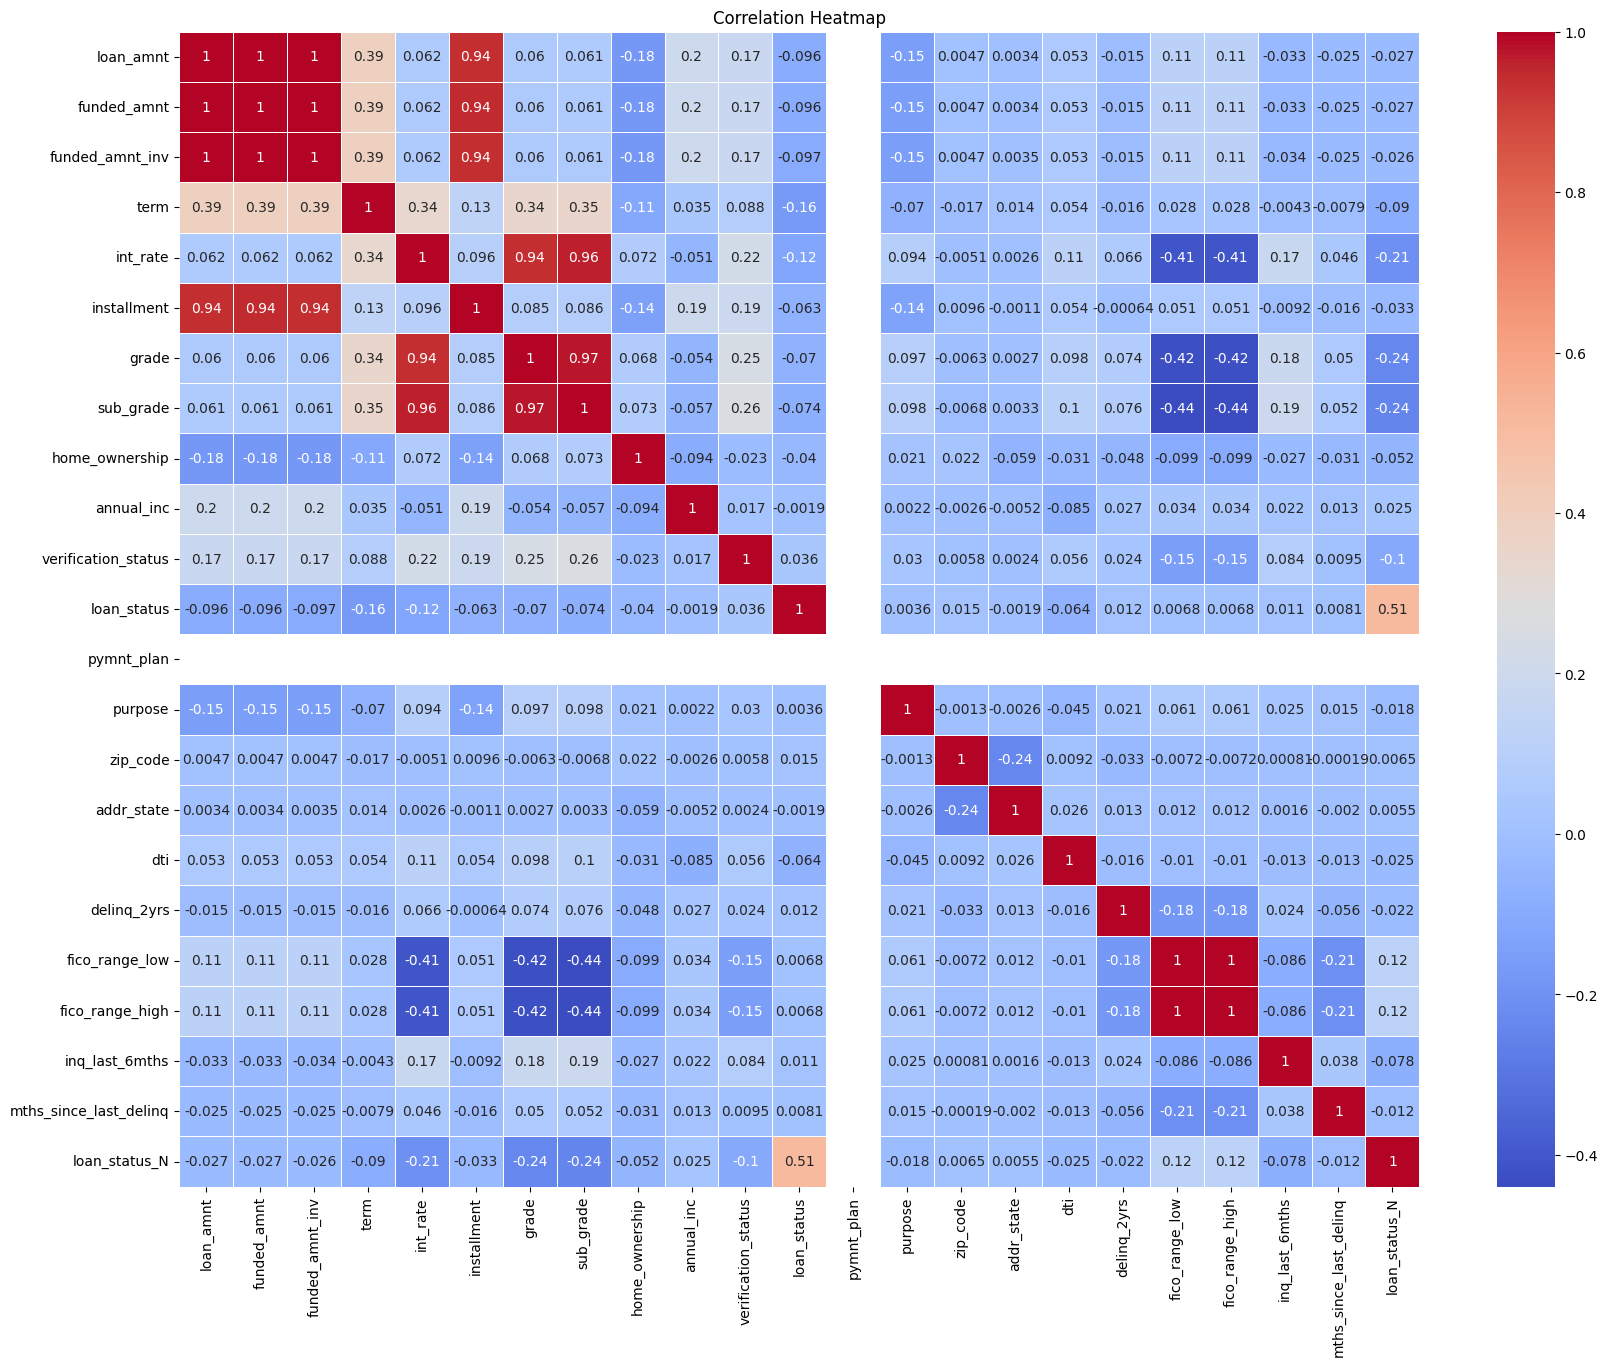

In [ ]:
# 상관관계 히트맵 그리기
correlation_matrix = new_df.corr()

# 히트맵 그리기
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.loc[:, 'loan_amnt':'funded_amnt_inv'].head(30)

,loan_amnt,funded_amnt,funded_amnt_inv
0,5000,5000,4975.000000
1,2500,2500,2500.000000
2,2400,2400,2400.000000
3,10000,10000,10000.000000
4,3000,3000,3000.000000
5,5000,5000,5000.000000
6,7000,7000,7000.000000
7,3000,3000,3000.000000
8,5600,5600,5600.000000
9,5375,5375,5350.000000


In [ ]:
# 대출 신청액과 은행에서의 승인액과 실제 대출금이 모두 다른 애들
df[(df['funded_amnt']!=df['funded_amnt_inv']) & (df['funded_amnt']!=df['loan_amnt'])]['loan_status_N'].value_counts()

loan_status_N
1    1260
0     280
Name: count, dtype: int64

In [ ]:
1260/(1260+280), 280/(1260+280)

(0.8181818181818182, 0.18181818181818182)

In [ ]:
df['verification_status'].value_counts()

verification_status
Source Verified    1142277
Not Verified       1062601
Verified            715803
Name: count, dtype: int64

In [ ]:
# 파생 변수 differ_amnt = (내가신청한금액 - 은행승인금액)
# 대출금액이 모두 다르기 때문에 비율로 바꾸는 것이 맞는 것 같지만,, 대출금액도 상황율과 연관이 있으니 금액 자체도 중요할 것 같기도 하고...
df['differ_amnt'] = df['loan_amnt'] - df['funded_amnt_inv']

In [ ]:
# (내가신청한금액 - 은행승인금액)이 큰 그룹 상위 1000명
df.sort_values('differ_amnt', ascending=False).loc[:, ['loan_status']].head(1000).value_counts()

loan_status       
Fully Paid            736
Charged Off           263
Current                 1
Default                 0
In Grace Period         0
Late (16-30 days)       0
Late (31-120 days)      0
Name: count, dtype: int64

In [ ]:
# 은행에서 승인한 금액이 내가 신청한 금액과 차이가 적은 그룹 하위 1000명
df.sort_values('differ_amnt', ascending=False).loc[:, ['loan_status']].tail(1000).value_counts()

loan_status       
Current               724
Fully Paid            203
Charged Off            54
Late (31-120 days)     15
In Grace Period         2
Late (16-30 days)       2
Default                 0
Name: count, dtype: int64

In [ ]:
df.sort_values('differ_amnt', ascending=False)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,loan_status_N,differ_amnt
10550,35000,35000,2525.003906,60,0.1599,850.950012,D,D2,1 cochran hyundai,< 1 year,MORTGAGE,51996.0,Verified,2011-08-01,Charged Off,n,home_improvement,Home Improvement,150xx,PA,5.540000,0,1999-06-01,765,769,0,-1,0,32474.996094
17593,35000,35000,4450.000000,60,0.1268,790.640015,C,C1,new breed logistics,3 years,MORTGAGE,101000.0,Verified,2011-03-01,Fully Paid,n,home_improvement,Home Improvement,760xx,TX,10.160000,0,1990-07-01,780,784,2,-1,1,30550.0
17755,35000,35000,4625.000000,60,0.1714,872.479980,E,E3,kronos foods inc,10+ years,MORTGAGE,120000.0,Verified,2011-03-01,Fully Paid,n,debt_consolidation,andy's recovery,604xx,IL,14.430000,1,1992-02-01,700,704,1,23,1,30375.0
229068,35000,35000,6075.000000,36,0.1065,1140.069946,B,B2,spia management,7 years,RENT,230000.0,Verified,2012-01-01,Charged Off,n,wedding,wedding,113xx,NY,4.870000,0,2006-10-01,730,734,2,-1,0,28925.0
12483,35000,35000,6196.695312,60,0.1749,879.090027,D,D5,us army,10+ years,MORTGAGE,105600.0,Verified,2011-06-01,Fully Paid,n,debt_consolidation,Debt Consolidation Loan,301xx,GA,25.190001,0,2001-06-01,730,734,1,-1,1,28803.304688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024483,15000,15000,15000.000000,60,0.1298,341.149994,B,B5,project supervisor,8 years,MORTGAGE,110480.0,Not Verified,2019-02-01,Fully Paid,n,debt_consolidation,Debt consolidation,349xx,FL,15.730000,0,2007-08-01,730,734,0,-1,1,0.0
1024484,10000,10000,10000.000000,60,0.1180,221.440002,B,B4,physician services director,5 years,RENT,101000.0,Not Verified,2019-02-01,Fully Paid,n,credit_card,Credit card refinancing,940xx,CA,13.110000,0,2009-08-01,730,734,0,-1,1,0.0
1024485,26000,26000,26000.000000,60,0.1502,618.820007,C,C3,legal assitant,7 years,OWN,55000.0,Not Verified,2019-02-01,Current,n,debt_consolidation,Debt consolidation,078xx,NJ,21.780001,0,1990-11-01,675,679,0,74,1,0.0
1024486,10000,10000,10000.000000,36,0.1502,346.760010,C,C3,medical billing,5 years,OWN,78000.0,Not Verified,2019-02-01,Fully Paid,n,credit_card,Credit card refinancing,484xx,MI,8.600000,0,2005-12-01,670,674,0,49,1,0.0


In [ ]:
df = df[~df['emp_title'].isna()]

In [ ]:
# home_ownership
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    1317359
RENT        1058035
OWN          278796
ANY            2635
OTHER           138
NONE             45
Name: count, dtype: int64

In [ ]:
purpose = df['purpose'].value_counts().reset_index()
purpose

,purpose,count
0,debt_consolidation,1496371
1,credit_card,631831
2,home_improvement,172420
3,other,158267
4,major_purchase,57038
5,medical,30942
6,car,26984
7,small_business,26063
8,vacation,18145
9,moving,17415


In [ ]:
loan_status_ratio = df.groupby('purpose')['loan_status'].value_counts(normalize=True).unstack()
loan_status_N_ratio = df.groupby('purpose')['loan_status_N'].value_counts(normalize=True).unstack()
loan_status_ratio

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
purpose,,,,,,,
car,0.094723,0.297473,0.000111,0.600800,0.002001,0.000926,0.003965
credit_card,0.098825,0.384283,0.000109,0.508209,0.002971,0.000780,0.004822
debt_consolidation,0.133695,0.326469,0.000144,0.530225,0.003432,0.000828,0.005209
educational,0.166113,0.000000,0.000000,0.833887,0.000000,0.000000,0.000000
home_improvement,0.109894,0.334834,0.000122,0.546335,0.003259,0.000725,0.004831
house,0.127694,0.401873,0.000517,0.456411,0.004597,0.001494,0.007413
major_purchase,0.123672,0.309390,0.000123,0.557137,0.003647,0.000964,0.005067
medical,0.129177,0.333301,0.000162,0.529216,0.002876,0.000743,0.004525
moving,0.150675,0.289463,0.000000,0.551019,0.002469,0.001206,0.005168


In [ ]:
loan_status_N_ratio

loan_status_N,0,1
purpose,,
car,0.101727,0.898273
credit_card,0.107508,0.892492
debt_consolidation,0.143307,0.856693
educational,0.166113,0.833887
home_improvement,0.118832,0.881168
house,0.141716,0.858284
major_purchase,0.133472,0.866528
medical,0.137483,0.862517
moving,0.159518,0.840482


In [ ]:
df.groupby('delinq_2yrs')['loan_status'].value_counts().head(30)

delinq_2yrs  loan_status       
0            Fully Paid            1135633
             Current                760918
             Charged Off            261492
             Late (31-120 days)      11118
             In Grace Period          6764
             Late (16-30 days)        1746
             Default                   281
1            Fully Paid             176723
             Current                 98466
             Charged Off             43414
             Late (31-120 days)       1609
             In Grace Period          1232
             Late (16-30 days)         295
             Default                    47
2            Fully Paid              51281
             Current                 25539
             Charged Off             13170
             Late (31-120 days)        475
             In Grace Period           416
             Late (16-30 days)         100
             Default                    18
3            Fully Paid              18532
             Current  

In [ ]:
df['delinq_2yrs'].value_counts()

delinq_2yrs
0     2177952
1      321786
2       90999
3       33098
4       14807
5        7421
6        4173
7        2383
8        1427
9         934
10        637
11        411
12        305
13        188
14        146
15        103
16         65
17         43
18         36
19         27
20         16
21         15
22          9
26          5
23          4
24          4
25          3
30          2
29          2
36          1
28          1
58          1
35          1
27          1
39          1
42          1
Name: count, dtype: Int64

In [ ]:
df.groupby('delinq_2yrs')['loan_status'].value_counts(normalize=True).unstack()

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
delinq_2yrs,,,,,,,
0,0.120063,0.349373,0.000129,0.521422,0.003106,0.000802,0.005105
1,0.134916,0.305998,0.000146,0.549194,0.003829,0.000917,0.005000
2,0.144727,0.280651,0.000198,0.563534,0.004571,0.001099,0.005220
3,0.153484,0.276573,0.000151,0.559913,0.004260,0.001118,0.004502
4,0.152023,0.280678,0.000135,0.555953,0.004592,0.001081,0.005538
5,0.156987,0.268158,0.000270,0.564210,0.004312,0.001348,0.004716
6,0.146657,0.269590,0.000000,0.573209,0.004553,0.001917,0.004074
7,0.158204,0.282837,0.000000,0.546370,0.005455,0.002098,0.005036
8,0.154170,0.271899,0.000701,0.560617,0.002803,0.001402,0.008409


In [ ]:
df.groupby('inq_last_6mths')['loan_status'].value_counts(normalize=True).unstack()

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
inq_last_6mths,,,,,,,
-1,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
0,0.105689,0.369226,0.000121,0.515942,0.003330,0.000800,0.004892
1,0.138759,0.316331,0.000149,0.535094,0.003328,0.000909,0.005430
2,0.169113,0.267365,0.000189,0.553780,0.003040,0.000922,0.005592
3,0.201654,0.204304,0.000120,0.585133,0.002836,0.000719,0.005233
4,0.226733,0.143564,0.000225,0.622786,0.002024,0.000731,0.003936
5,0.234464,0.133052,0.000325,0.625994,0.001785,0.000811,0.003570
6,0.235099,0.000000,0.000000,0.764901,0.000000,0.000000,0.000000
7,0.214286,0.000000,0.000000,0.785714,0.000000,0.000000,0.000000


In [ ]:
df['issue_d'].sort_values(ascending=False)

1844174   2020-09-01
1848034   2020-09-01
1848026   2020-09-01
1848027   2020-09-01
1848028   2020-09-01
             ...    
39758     2007-07-01
39752     2007-07-01
39750     2007-07-01
39751     2007-07-01
39785     2007-06-01
Name: issue_d, Length: 2657008, dtype: datetime64[ns]

In [ ]:
origin_data = pd.read_feather('/content/drive/MyDrive/기업연계 프로젝트/lending_club_clean.feather')

In [ ]:
origin_data[origin_data['loan_status'] == 'Issued'][['issue_d']].sort_values(by='issue_d', ascending=False)

,issue_d
1839919,2020-09-01
1839848,2020-09-01
1839923,2020-09-01
1839922,2020-09-01
1839921,2020-09-01
...,...
1750937,2020-02-01
1749691,2020-02-01
1749399,2020-02-01
1748366,2020-02-01


In [ ]:
# 기준 날짜 설정
reference_date = pd.Timestamp('2020-09-01')

# 각 날짜와 기준 날짜 간의 차이를 계산하여 경과 개월 수를 계산
df['issue_m'] = ((reference_date.year - df['issue_d'].dt.year) * 12 + (reference_date.month - df['issue_d'].dt.month))

In [ ]:
df.sort_values(by='issue_m', ascending=False).loc[:, ['issue_m', 'loan_status', 'loan_status_N']].head(50)

,issue_m,loan_status,loan_status_N
39785,159,Fully Paid,1
39762,158,Fully Paid,1
39770,158,Fully Paid,1
39752,158,Fully Paid,1
39758,158,Fully Paid,1
39759,158,Fully Paid,1
39760,158,Fully Paid,1
39761,158,Fully Paid,1
39763,158,Fully Paid,1
39764,158,Fully Paid,1


In [ ]:
df.sort_values(by='issue_m', ascending=False).loc[:, ['issue_m', 'loan_status', 'loan_status_N']].tail(50)

,issue_m,loan_status,loan_status_N
1848080,0,Current,1
1848079,0,Current,1
1848078,0,Current,1
1848077,0,Current,1
1848075,0,Current,1
1848074,0,Current,1
1848072,0,Current,1
1848071,0,Current,1
1848070,0,Current,1
1848069,0,Current,1


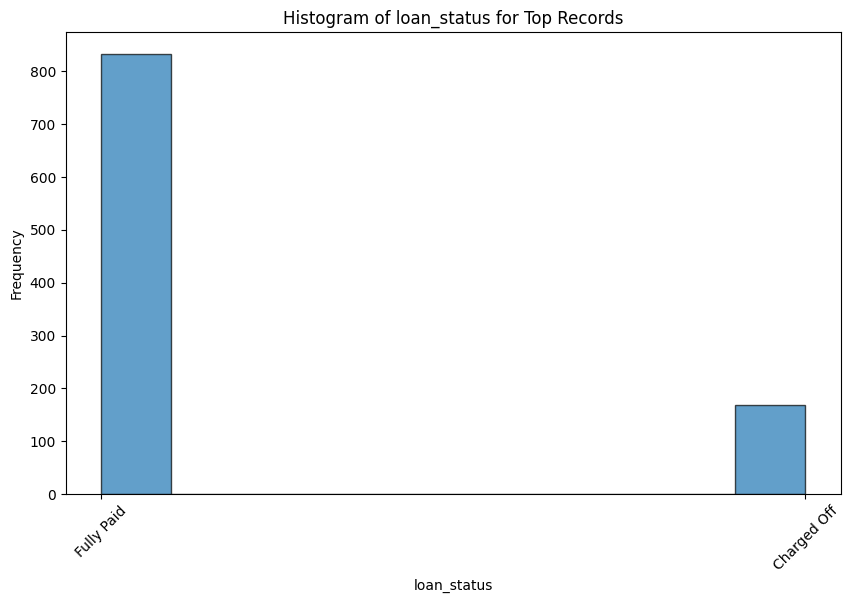

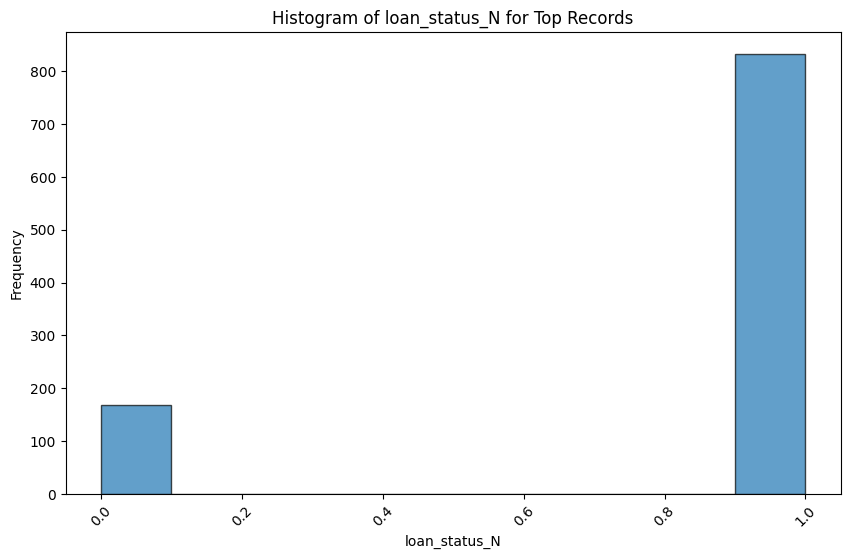

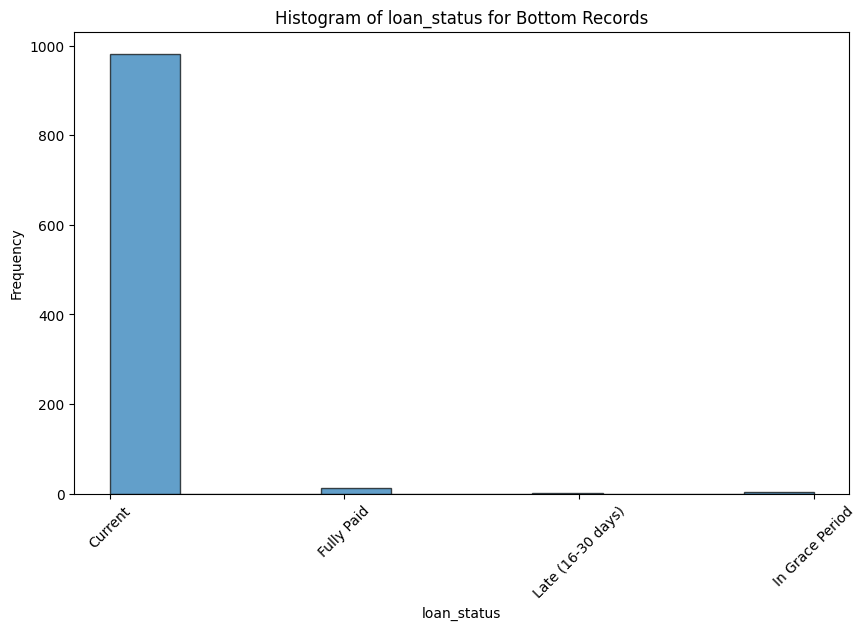

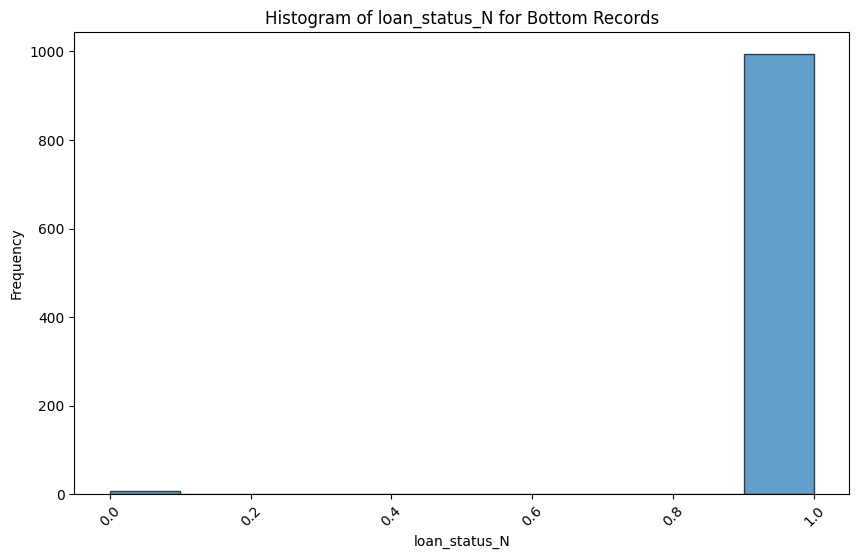

In [ ]:
top = df.sort_values(by='issue_m', ascending=False).loc[:, ['issue_m', 'loan_status', 'loan_status_N']].head(1000)
bottom = df.sort_values(by='issue_m', ascending=False).loc[:, ['issue_m', 'loan_status', 'loan_status_N']].tail(1000)

# 히스토그램 그리기
for data, label in zip([top, bottom], ['Top', 'Bottom']):
    for col in ['loan_status', 'loan_status_N']:
        plt.figure(figsize=(10, 6))
        plt.hist(data[col], bins=10, edgecolor='k', alpha=0.7)
        plt.title(f'Histogram of {col} for {label} Records')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.show()

In [ ]:
df['years_since_earliest_cr_line'] = reference_date.year - df['earliest_cr_line'].dt.year - ((reference_date.month < df['earliest_cr_line'].dt.month) | ((reference_date.month == df['earliest_cr_line'].dt.month) & (reference_date.day < df['earliest_cr_line'].dt.day))).astype(int)

In [ ]:
df['years_since_earliest_cr_line'].sort_values(ascending=False)

2424757    87
2862843    86
326945     86
326724     86
1721613    76
           ..
1741253     3
1723878     3
1726904     3
1729837     3
1850246     3
Name: years_since_earliest_cr_line, Length: 2657008, dtype: int64

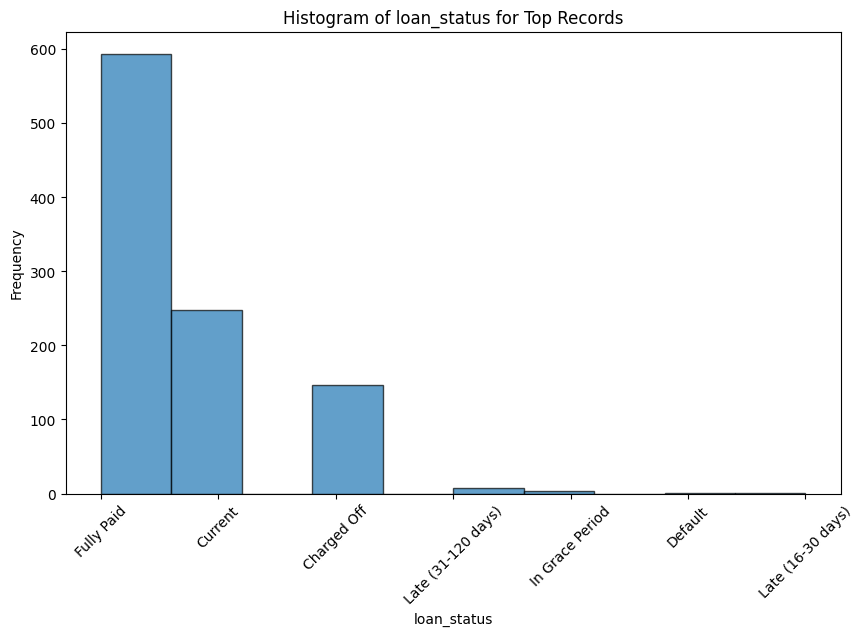

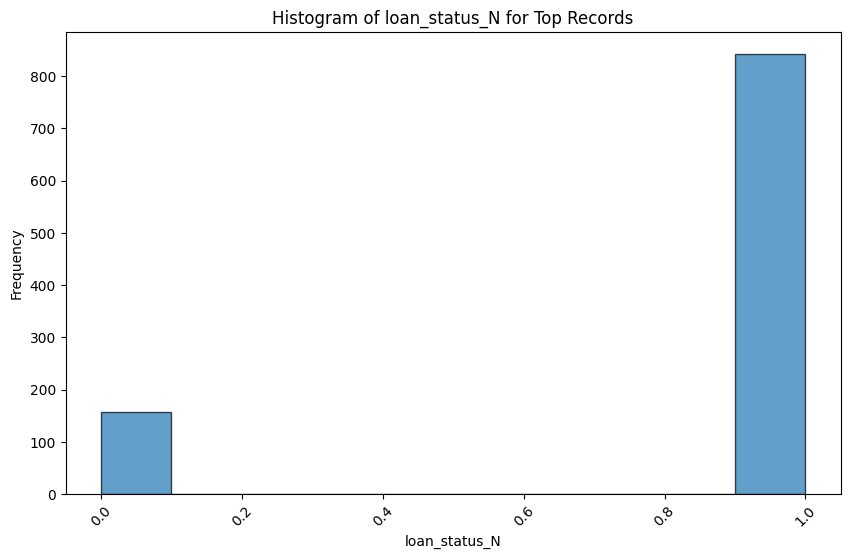

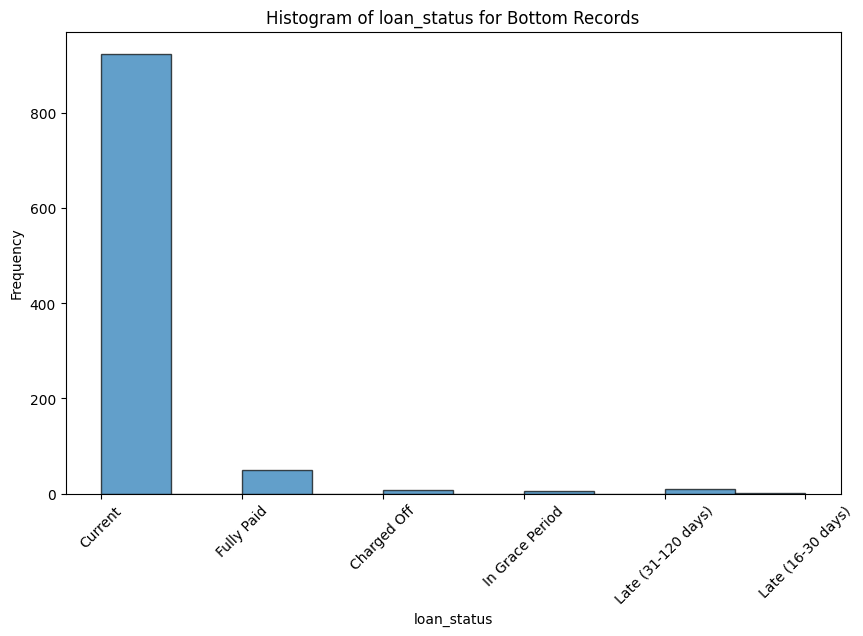

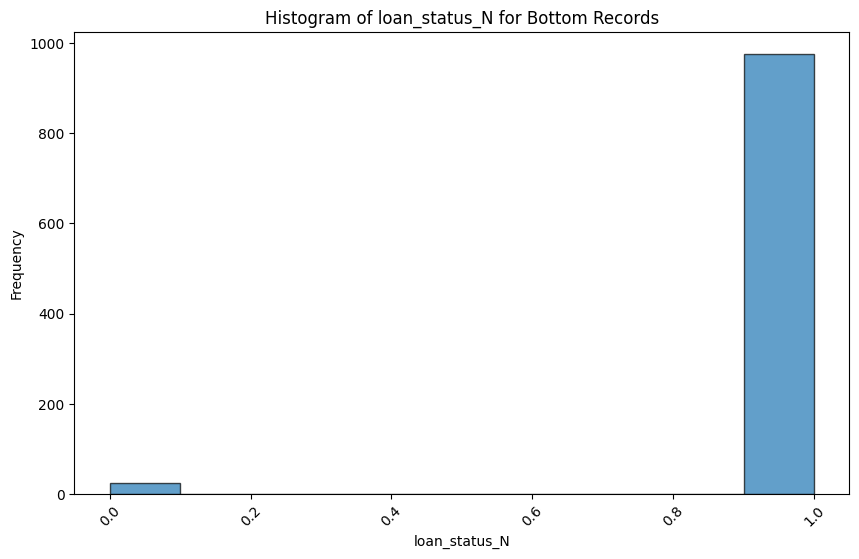

In [ ]:
top2 = df.sort_values(by='years_since_earliest_cr_line', ascending=False).loc[:, ['years_since_earliest_cr_line', 'loan_status', 'loan_status_N']].head(1000)
bottom2 = df.sort_values(by='years_since_earliest_cr_line', ascending=False).loc[:, ['years_since_earliest_cr_line', 'loan_status', 'loan_status_N']].tail(1000)

# 히스토그램 그리기
for data, label in zip([top2, bottom2], ['Top', 'Bottom']):
    for col in ['loan_status', 'loan_status_N']:
        plt.figure(figsize=(10, 6))
        plt.hist(data[col], bins=10, edgecolor='k', alpha=0.7)
        plt.title(f'Histogram of {col} for {label} Records')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.show()

In [ ]:
df.groupby('earliest_cr_line')['loan_status'].value_counts(normalize=True).unstack()

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
earliest_cr_line,,,,,,,
1933-03-01,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0
1934-02-01,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0
1934-04-01,0.500000,0.000000,0.0,0.5,0.0,0.0,0.0
1944-01-01,0.166667,0.333333,0.0,0.5,0.0,0.0,0.0
1945-02-01,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2017-03-01,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0
2017-04-01,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0
2017-05-01,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
filtered_df = df[(df['dti'] >0) & (df['dti'] <100)]

# 'dti' 값을 기준으로 내림차순 정렬하고 필요한 열만 선택
filtered_df.sort_values(by='dti', ascending=False).loc[:, ['dti', 'loan_status', 'loan_status_N']]

,dti,loan_status,loan_status_N
1822090,99.930000,Current,1
587844,99.919998,Fully Paid,1
336825,99.900002,Charged Off,0
1433712,99.870003,Current,1
1016362,99.870003,Current,1
...,...,...,...
2143847,0.010000,Fully Paid,1
432999,0.010000,Current,1
112693,0.010000,Fully Paid,1
904667,0.010000,Fully Paid,1


In [ ]:
 filtered_df.sort_values(by='dti', ascending=False).loc[:, ['dti', 'loan_status', 'loan_status_N']].head(000130)['loan_status_N'].sum()

110676

In [ ]:
110676/130000

0.8513538461538461

In [ ]:
 filtered_df.sort_values(by='dti', ascending=False).loc[:, ['dti', 'loan_status', 'loan_status_N']].tail(130000)['loan_status_N'].sum()

115098

In [ ]:
115098/130000

0.8853692307692308

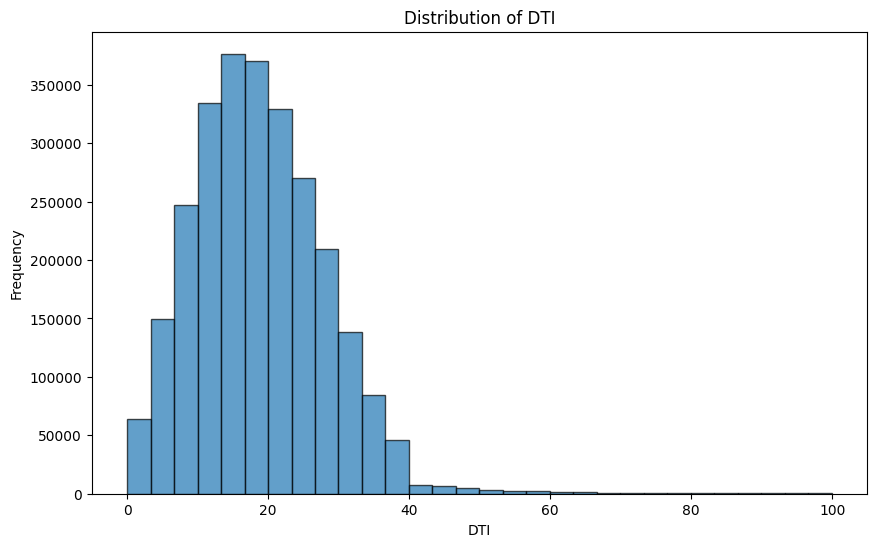

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['dti'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of DTI')
plt.xlabel('DTI')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.sort_values(by = 'mths_since_last_delinq', ascending=False).head(1000)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,loan_status_N,differ_amnt,issue_m,years_since_earliest_cr_line,fico_mean
526092,26000,26000,25975.0,60,0.2485,760.849976,E,E3,army,10+ years,RENT,52048.800781,Verified,2018-02-01,Charged Off,n,debt_consolidation,Debt consolidation,224xx,VA,33.830002,0,2007-07-01,660,664,1,226,0,25.0,31,13,662.0
397910,30000,30000,30000.0,60,0.1903,778.719971,D,D3,registered nurse,10+ years,MORTGAGE,90000.000000,Not Verified,2017-11-01,Charged Off,n,debt_consolidation,Debt consolidation,388xx,MS,38.340000,0,1996-10-01,710,714,1,202,0,0.0,34,23,712.0
1209307,20000,20000,20000.0,60,0.1640,490.630005,C,C4,project manager,3 years,RENT,58500.000000,Source Verified,2019-04-01,Current,n,debt_consolidation,Debt consolidation,685xx,NE,27.440001,0,2006-02-01,700,704,0,202,1,0.0,17,14,702.0
2692078,14000,14000,14000.0,60,0.1399,325.690002,C,C3,technician,8 years,MORTGAGE,41858.750000,Source Verified,2016-11-01,Charged Off,n,debt_consolidation,Debt consolidation,333xx,FL,5.190000,0,1995-03-01,720,724,1,195,0,0.0,46,25,722.0
2388222,1500,1500,1500.0,36,0.1953,55.389999,D,D5,truck driver,10+ years,RENT,61000.000000,Verified,2016-02-01,Fully Paid,n,medical,Medical expenses,917xx,CA,35.080002,0,1999-03-01,665,669,0,192,1,0.0,55,21,667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482916,2000,2000,2000.0,36,0.1524,69.570000,C,C2,postdoctoral fellow,4 years,RENT,48000.000000,Not Verified,2019-10-01,Current,n,other,Other,207xx,MD,17.290001,0,2005-08-01,680,684,0,105,1,0.0,11,15,682.0
2806561,5000,5000,5000.0,36,0.0749,155.509995,A,A4,foreman,10+ years,RENT,77000.000000,Source Verified,2017-01-01,Fully Paid,n,other,Other,082xx,NJ,9.930000,0,2010-03-01,705,709,0,105,1,0.0,44,10,707.0
506341,10000,10000,10000.0,36,0.0796,313.179993,A,A5,receptionist,10+ years,RENT,35000.000000,Not Verified,2018-03-01,Current,n,credit_card,Credit card refinancing,912xx,CA,34.669998,0,1996-10-01,700,704,0,105,1,0.0,30,23,702.0
2391720,30000,30000,30000.0,60,0.2050,803.190002,E,E4,project manager,10+ years,RENT,75000.000000,Source Verified,2016-01-01,Fully Paid,n,debt_consolidation,Debt consolidation,331xx,FL,23.010000,0,2002-02-01,675,679,0,105,1,0.0,56,18,677.0


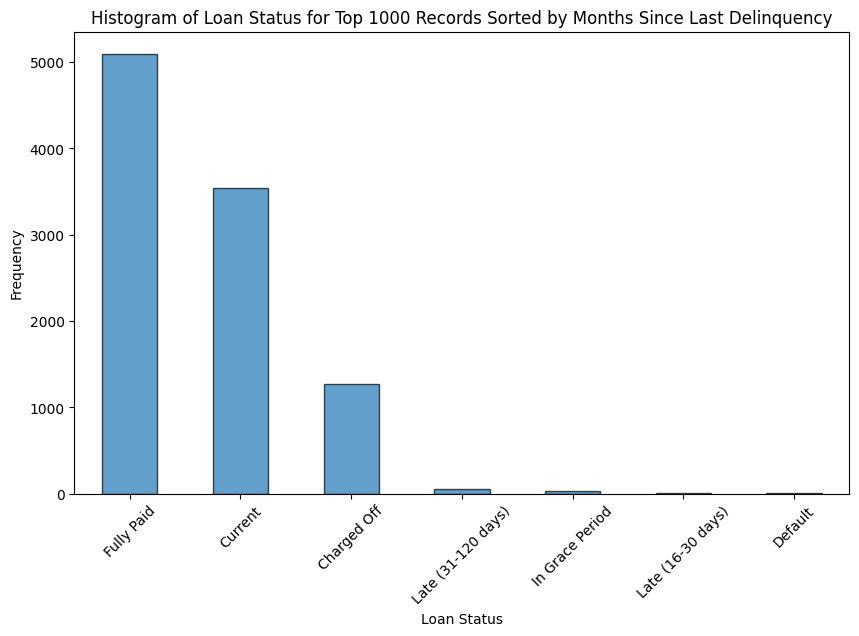

In [ ]:
top = df.sort_values(by='mths_since_last_delinq', ascending=False).head(10000)

# 'loan_status'의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
top['loan_status'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Histogram of Loan Status for Top 1000 Records Sorted by Months Since Last Delinquency')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

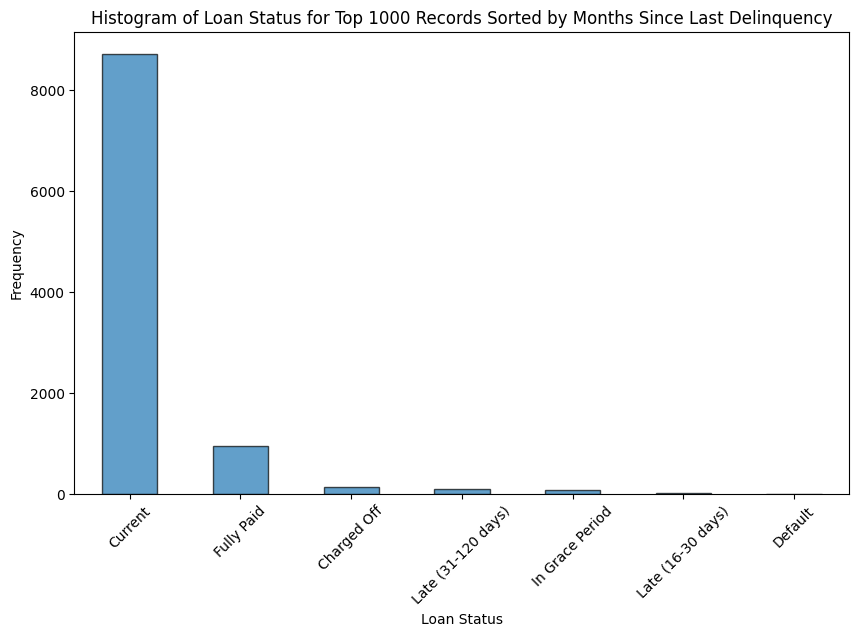

In [ ]:
tail = df.sort_values(by='mths_since_last_delinq', ascending=False).tail(10000)

# 'loan_status'의 분포를 히스토그램으로 시각화
plt.figure(figsize=(10, 6))
tail['loan_status'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Histogram of Loan Status for Top 1000 Records Sorted by Months Since Last Delinquency')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
top['loan_status'].value_counts(normalize=True)
top['loan_status_N'].value_counts(normalize=True)

loan_status_N
1    0.8636
0    0.1364
Name: proportion, dtype: float64

In [ ]:
tail['loan_status'].value_counts(normalize=True)
tail['loan_status_N'].value_counts(normalize=True)

loan_status_N
1    0.9679
0    0.0321
Name: proportion, dtype: float64

In [ ]:
top

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,loan_status_N,differ_amnt,issue_m,years_since_earliest_cr_line
526092,26000,26000,25975.0,60,0.2485,760.849976,E,E3,army,10+ years,RENT,52048.800781,Verified,2018-02-01,Charged Off,n,debt_consolidation,Debt consolidation,224xx,VA,33.830002,0,2007-07-01,660,664,1,226,0,25.0,31,13
397910,30000,30000,30000.0,60,0.1903,778.719971,D,D3,registered nurse,10+ years,MORTGAGE,90000.000000,Not Verified,2017-11-01,Charged Off,n,debt_consolidation,Debt consolidation,388xx,MS,38.340000,0,1996-10-01,710,714,1,202,0,0.0,34,23
1209307,20000,20000,20000.0,60,0.1640,490.630005,C,C4,project manager,3 years,RENT,58500.000000,Source Verified,2019-04-01,Current,n,debt_consolidation,Debt consolidation,685xx,NE,27.440001,0,2006-02-01,700,704,0,202,1,0.0,17,14
2692078,14000,14000,14000.0,60,0.1399,325.690002,C,C3,technician,8 years,MORTGAGE,41858.750000,Source Verified,2016-11-01,Charged Off,n,debt_consolidation,Debt consolidation,333xx,FL,5.190000,0,1995-03-01,720,724,1,195,0,0.0,46,25
2388222,1500,1500,1500.0,36,0.1953,55.389999,D,D5,truck driver,10+ years,RENT,61000.000000,Verified,2016-02-01,Fully Paid,n,medical,Medical expenses,917xx,CA,35.080002,0,1999-03-01,665,669,0,192,1,0.0,55,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80647,15000,15000,15000.0,36,0.1430,514.859985,C,C1,project analyst,1 year,RENT,57600.000000,Verified,2013-10-01,Fully Paid,n,debt_consolidation,Bill Consolidation,274xx,NC,12.100000,0,1997-06-01,665,669,0,81,1,0.0,83,23
1204996,25000,25000,25000.0,60,0.1474,591.349976,C,C2,lpn,10+ years,MORTGAGE,75000.000000,Source Verified,2019-04-01,Current,n,debt_consolidation,Debt consolidation,291xx,SC,13.790000,0,2006-09-01,700,704,0,81,1,0.0,17,14
2085437,27000,27000,26900.0,60,0.1825,689.299988,E,E1,director of operations,5 years,MORTGAGE,110656.000000,Source Verified,2015-07-01,Fully Paid,n,credit_card,Credit card refinancing,577xx,SD,15.650000,0,2003-05-01,660,664,0,81,1,100.0,62,17
405338,5000,5000,5000.0,36,0.1199,166.050003,B,B5,inspector,5 years,RENT,55000.000000,Source Verified,2017-11-01,Current,n,major_purchase,Major purchase,075xx,NJ,7.090000,0,2007-08-01,685,689,0,81,1,0.0,34,13


In [ ]:
df.loc[:,'fico_range_low':'fico_range_high']

,fico_range_low,fico_range_high
1,740,744
3,690,694
4,695,699
5,730,734
6,690,694
...,...,...
2925487,670,674
2925488,725,729
2925489,705,709
2925490,670,674


In [ ]:
df['fico_mean'] = (df['fico_range_high']+df['fico_range_low'])/2

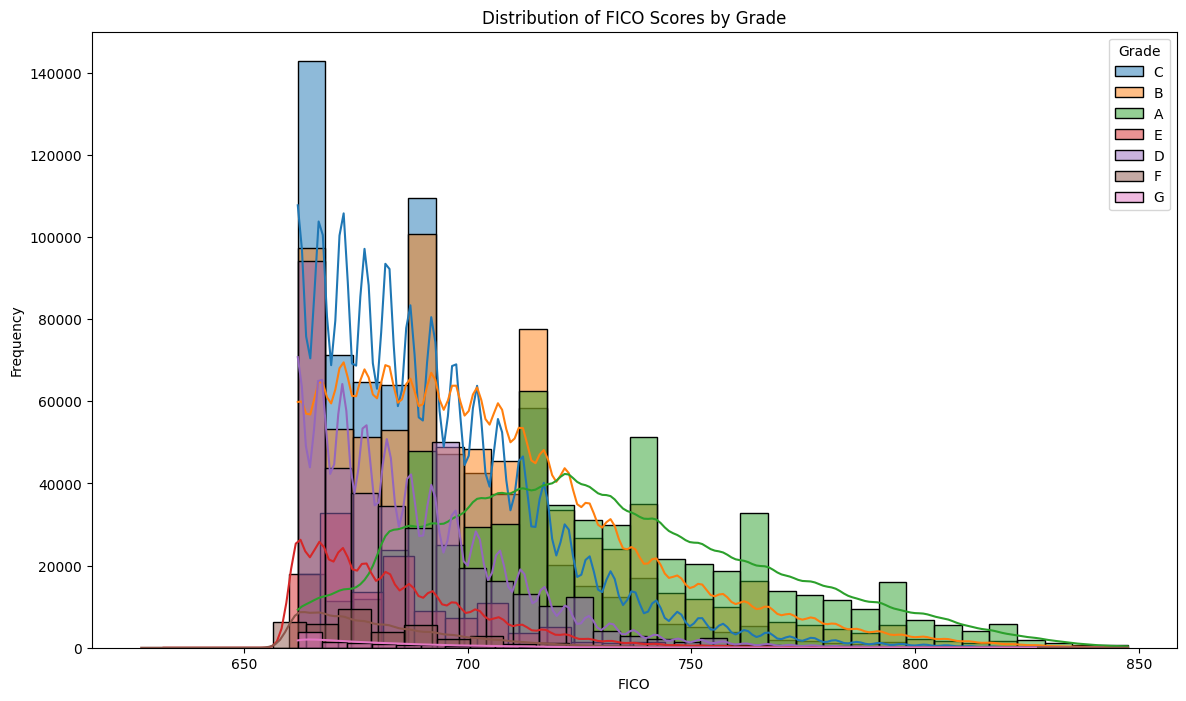

In [ ]:
plt.figure(figsize=(14, 8))
grades = df['grade'].unique()
for grade in grades:
    subset = df[df['grade'] == grade]
    sns.histplot(subset['fico_mean'], label=grade, kde=True, bins=30)

plt.title('Distribution of FICO Scores by Grade')
plt.xlabel('FICO')
plt.ylabel('Frequency')
plt.legend(title='Grade')
plt.show()

In [ ]:
grade_fico = df.groupby('grade')['fico_mean'].agg(['max', 'median', 'mean', 'min', 'std']).reset_index()
grade_fico

,grade,max,median,mean,min,std
0,A,847.5,727.0,728.945127,662.0,37.075413
1,B,847.5,697.0,703.370289,662.0,31.544107
2,C,847.5,687.0,691.724453,662.0,25.057149
3,D,842.0,682.0,686.28532,662.0,21.665674
4,E,842.0,677.0,684.428981,632.0,20.656354
5,F,847.5,677.0,682.393052,627.0,19.823287
6,G,827.0,677.0,681.466667,662.0,19.520658


In [ ]:
df['zip_code'].value_counts() # zip_code와 소득 비교

zip_code
750xx    28621
945xx    28028
112xx    27949
606xx    24908
300xx    24321
         ...  
507xx        1
429xx        1
002xx        1
682xx        0
514xx        0
Name: count, Length: 962, dtype: int64